# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [2435]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [2436]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

# import library to perform statistical computation.It's a growing library of statistical functions and contains large number of probability distributions 
import scipy.stats as stats

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Loading the dataset

In [2439]:
#loading and reading the required dataset into Dataframe from jupyter notebook
data=pd.read_csv('used_device_data.csv')

In [2440]:
#make a copy of dataset
data_copy=data.copy


- *It's always a good practice to make a copy of datasets before doing any analysis.*

## Data Overview

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape/datatypes etc of the dataset
  - Getting the statistical summary for the variables
  - Check for missing values
  - Check for duplicates

#### Displaying the first 5 rows of the dataset

In [2445]:
#read first 5 dataset using head() function
data.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

#### Displaying the last 5 rows of the dataset

In [2447]:
#read last 5 dataset using tail() function
data.tail()

brand_name       os  screen_size   4g  5g  main_camera_mp  \
3449       Asus  Android        15.34  yes  no             NaN   
3450       Asus  Android        15.24  yes  no            13.0   
3451    Alcatel  Android        15.80  yes  no            13.0   
3452    Alcatel  Android        15.80  yes  no            13.0   
3453    Alcatel  Android        12.83  yes  no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
3449               8.0        64.0  6.0   5000.0   190.0          2019   
3450               8.0       128.0  8.0   4000.0   200.0          2018   
3451               5.0        32.0  3.0   4000.0   165.0          2020   
3452               5.0        32.0  2.0   4000.0   160.0          2020   
3453               5.0        16.0  2.0   4000.0   168.0          2020   

      days_used  normalized_used_price  normalized_new_price  
3449        232               4.492337              6.483872  
3450        541               5.037732              6.251538  
3451        201               4.357350              4.528829  
3452        149               4.349762              4.624188  
3453        176               4.132122              4.279994

#### Displaying random 5 rows of the dataset

In [2449]:
data.sample(n=5)

brand_name       os  screen_size   4g  5g  main_camera_mp  \
2444    Samsung  Android        12.70  yes  no             8.0   
490     Alcatel  Android        12.83  yes  no            13.0   
932      Others  Android        10.29  yes  no             5.0   
1597     Lenovo  Android        10.29   no  no             5.0   
573      Others  Android        15.29  yes  no            12.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
2444               5.0        16.0  4.0   2600.0  139.00          2016   
490                5.0        32.0  4.0   3000.0  159.95          2016   
932                2.0        32.0  4.0   3000.0  181.00          2015   
1597               0.3        16.0  4.0   2000.0  145.00          2014   
573               16.0        32.0  4.0   3000.0  210.00          2018   

      days_used  normalized_used_price  normalized_new_price  
2444        625               4.097506              4.877789  
490         811               4.332442              4.942856  
932         759               4.818183              5.828298  
1597        958               3.401864              4.245777  
573         616               4.930870              5.803266

`sample(n=5) ` function will display any randomly selected 5 rows of the dataset here, instead of fetching first 5 or last 5 rows using head() and tail() functions respectively.

#### Checking the shape of dataset

In [2452]:
# Using shape attributes we can determine the number of rows and columns present in the dataset
data.shape
print('The dataset Recell contains', data.shape[0], 'rows and', data.shape[1],' columns')

The dataset Recell contains 3454 rows and 15  columns


- *There are 3454 rows and 15 columns present in the given dataset(Recell).*

#### Checking the data types of the columns

In [2455]:
#Display datatypes of the different columns using info() function . It also provide informations on missing data in any columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

#### Observation:

- *There are `3454 rows and 15 columns` present in the given dataset.*
- *The dataset contains total of `15 columns` of datatypes `float(9)`,`Integer(2)` and `object(4)`.*
- *There are `11 columns` which are numerical in nature, the columns `release_year and days_used`are stored as `int`.*
- *The columns `screen_size, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, normalized_used_price and normalized_new_price` are          stored as floats since they required decimal placing.*
- *The remaining `4 columns` `brand_name, os, 4g, 5g` are catogorical data and stored as object(string).*
- *There are some `missing values present` in few columns like `main_camera_mp, selfie_camera_mp , int_memory, ram, battery and weight`.*
- *The column `release_year` is of type `int` instead of date, but since we need to do `linear regression` analysis further(which works only on numerical       datatypes), hence we will not convert it to date format.*
                

#### Statistical summary of the dataset

- *The `describe()` function will display the summary statistics of the numerical data. To view summary statistics of both numerical and categorical data we use describe(include='all')*.

In [2460]:
#Display statistical summary of the data only numerical columns
data.describe().T

count         mean          std          min  \
screen_size            3454.0    13.713115     3.805280     5.080000   
main_camera_mp         3275.0     9.460208     4.815461     0.080000   
selfie_camera_mp       3452.0     6.554229     6.970372     0.000000   
int_memory             3450.0    54.573099    84.972371     0.010000   
ram                    3450.0     4.036122     1.365105     0.020000   
battery                3448.0  3133.402697  1299.682844   500.000000   
weight                 3447.0   182.751871    88.413228    69.000000   
release_year           3454.0  2015.965258     2.298455  2013.000000   
days_used              3454.0   674.869716   248.580166    91.000000   
normalized_used_price  3454.0     4.364712     0.588914     1.536867   
normalized_new_price   3454.0     5.233107     0.683637     2.901422   

                               25%          50%          75%          max  
screen_size              12.700000    12.830000    15.340000    30.710000  
main_camera_mp            5.000000     8.000000    13.000000    48.000000  
selfie_camera_mp          2.000000     5.000000     8.000000    32.000000  
int_memory               16.000000    32.000000    64.000000  1024.000000  
ram                       4.000000     4.000000     4.000000    12.000000  
battery                2100.000000  3000.000000  4000.000000  9720.000000  
weight                  142.000000   160.000000   185.000000   855.000000  
release_year           2014.000000  2015.500000  2018.000000  2020.000000  
days_used               533.500000   690.500000   868.750000  1094.000000  
normalized_used_price     4.033931     4.405133     4.755700     6.619433  
normalized_new_price      4.790342     5.245892     5.673718     7.847841

In [2461]:
#Display statistical summary of the data for all columns
data.describe(include='all').T

count unique      top  freq         mean          std  \
brand_name               3454     34   Others   502          NaN          NaN   
os                       3454      4  Android  3214          NaN          NaN   
screen_size            3454.0    NaN      NaN   NaN    13.713115      3.80528   
4g                       3454      2      yes  2335          NaN          NaN   
5g                       3454      2       no  3302          NaN          NaN   
main_camera_mp         3275.0    NaN      NaN   NaN     9.460208     4.815461   
selfie_camera_mp       3452.0    NaN      NaN   NaN     6.554229     6.970372   
int_memory             3450.0    NaN      NaN   NaN    54.573099    84.972371   
ram                    3450.0    NaN      NaN   NaN     4.036122     1.365105   
battery                3448.0    NaN      NaN   NaN  3133.402697  1299.682844   
weight                 3447.0    NaN      NaN   NaN   182.751871    88.413228   
release_year           3454.0    NaN      NaN   NaN  2015.965258     2.298455   
days_used              3454.0    NaN      NaN   NaN   674.869716   248.580166   
normalized_used_price  3454.0    NaN      NaN   NaN     4.364712     0.588914   
normalized_new_price   3454.0    NaN      NaN   NaN     5.233107     0.683637   

                            min       25%       50%       75%       max  
brand_name                  NaN       NaN       NaN       NaN       NaN  
os                          NaN       NaN       NaN       NaN       NaN  
screen_size                5.08      12.7     12.83     15.34     30.71  
4g                          NaN       NaN       NaN       NaN       NaN  
5g                          NaN       NaN       NaN       NaN       NaN  
main_camera_mp             0.08       5.0       8.0      13.0      48.0  
selfie_camera_mp            0.0       2.0       5.0       8.0      32.0  
int_memory                 0.01      16.0      32.0      64.0    1024.0  
ram                        0.02       4.0       4.0       4.0      12.0  
battery                   500.0    2100.0    3000.0    4000.0    9720.0  
weight                     69.0     142.0     160.0     185.0     855.0  
release_year             2013.0    2014.0    2015.5    2018.0    2020.0  
days_used                  91.0     533.5     690.5    868.75    1094.0  
normalized_used_price  1.536867  4.033931  4.405133    4.7557  6.619433  
normalized_new_price   2.901422  4.790342  5.245892  5.673718  7.847841

In [2462]:
#list of categorical columns name
sel_catgcal_cols=['brand_name','os','4g','5g']

In [2463]:
#create a dataframe for performing calculation on these columns
df_cat=data[sel_catgcal_cols]


**basic functions to calculate/display value_counts, value_count percentwise for selected categorical columns**

In [2465]:
#basic functions to calculate/display value_counts, value_count percentwise for selected categorical columns
def basic_checks(df,cols_name):
    for cols in cols_name:
        cols_value_count=df[cols].value_counts()                 #calculate value_counts for selected categorical columns
        cols_value_perc= df[cols].value_counts(normalize=True)   #calculate value_counts percentwise for selected categorical columns

        #print the results
        print(50 * '-')
        print('Display value counts for column:',cols)          
        print(50 * '-')
        print(cols_value_count)
        print(50 * '-')
        print('Display value percentage for column:',cols)
        print(50 * '-')
        print(round(cols_value_perc*100),2)
    

In [2466]:
#call the functions for basic validations
basic_checks(df_cat,sel_catgcal_cols)

--------------------------------------------------
Display value counts for column: brand_name
--------------------------------------------------
brand_name
Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: count, dtype: int64
--------------------------------------------------
Display value percentage for column: brand_name
--------------------------------------------------
brand_name
Others        15.0
Samsung       10.0
Huawei

**Statistical observations:**

- *`brand_name`: There are `34` unique brand name with `502 brand names` not listed and falls under `Others` category. The next most preferred known      brands are `Samsung(341)` followed by `Huawei(251)`*.
  
- *`os`: There are `4 different types of os` with `Android` occupying approx `93.0 %` of market data while `Others, Windows(2.0),iOS (1.0) together` occupies only ~ `7 percent`.*
- *`screen_size`: The `average screen size` of refurbished/used (phones or tablets) is `around 13.7 cm`. Ranging from `minimum of 5cm` to maximum of `30.7 cm`*. 
- *`4g`:It has two unique value `yes` or `no`.There are `2335 devices `which support `4g` and accounts for `approx 68%`.*
  
- *`5g`: There are few devices which support `5g` but their percentage is very low around `4 percent` and are again represented as `yes` or `no`.*
  
- *`main_camera_mp`: `75 percent` of devices has resolution of around `13 megapixels for rear camera`, with `maximum and minimum resolution` ranging from  `.08 to 48 mp` indicates that devices ranges from old basic low budget(phones/tablets) to high-end smartphones*.
  
- *`selfie_camera_mp`: `Average resolution of front camera` of the devices are around `6.5 mp` which typically falls between `50% to 75%` of data.*
  
- *`int_memory`: Internal memory lies between `minimum of 0.0 1GB to maximum of 1024 GB`, They are more spread out with standard deviation of ~85 and mean of approx 55 GB.*
  
- *`ram`: `75% of devices` have ram of `size 4.0 GB` with maximum value of 12.0 GB.*
- *`battery`: There is `huge variation(sd=1299.68)` in battery capacity ranging from `500.00(min) to 9720.00 mAh(max)`.*
  
- *`weight`: The `average weight` of the devices in `grams is 182.75`. The huge difference in maximum and maximum weights of a devices indicate the        website offers variety of devices, ranging from small light basic phone to heavier High-end smartphones or Tablets/Ipad.*
  
- *`release_year`: The release_year of devices ranges from `year 2013-2020`.*
  
- *`days_used`: The minimum and maximum number of days refurbished/used devices has been used are `91 and 1094 days` resp.*
  
- *`normalized_used_price`:The `average normalized price of a used device` of the same model in euros is around `4.3 with maximum of 6.6`, indicating low       variation.*
- *`normalized_new_price`: The `average` normalized price of the new device in euros is around `5.2 `with `minimum of 2.9`, indicating less spread         in data.*



#### Check for duplicate data

In [2469]:
data.duplicated().sum()  #Additional steps- to check if any duplicate rows are present in the dataset.

0

- *There are no duplicate entries present in the given dataset.*

#### Check for null/missing value

In [2472]:
#lets check for missing/null values
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- *As observed earlier in `data.info() results` and also from the above result, there are `few columns present with missing/null values`.They are listed in the below table along with the counts.*


|Column name|Missing/null values|
|:-----------|----------------|
|main_camera_mp     |  179|
|selfie_camera_mp|2|
|int_memory|4|
|ram|4|
|battery|6|
|weight|7|    

## Exploratory Data Analysis

### Univariate Analysis

#### *lets do univariate analysis for below columns:*
1. brand_name
2. os
3. screen_size
4. 4g
5. 5g
6. main_camera_mp
7. selfie_camera_mp
8. int_memory
9. ram
10. battery
11. weight
12. release_year
13. days_used
14. normalized_new_price
15. normalized_used_price 


#### Univariate Analysis on numerical columns

**Lets create a separate functions to plot histogram and boxplot for all the numericals columns and categorical columns**

`Numerical columns list`  : screen_size , main_camera_mp , selfie_camera_mp , int_memory , ram , battery , weight , days_used, normalized_new_price ,                                             normalized_used_price.<br>
`Categorical columns list`: brand_name , os , 4g , 5g, release_year.


**Function for numerical columns**

In [2481]:
#create a function to plot histogram and box plot for numericals columns 
def univariate_analysis_for_numCols(df,column_name, figsize=(15, 10),kde=True):
    """
    Boxplot and histogram combined

    df: dataframe
    column_name: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    
    """
       
        # creating the 2 subplots one for histogram and another for boxplot
          
    f, (ax_hist, ax_box) = plt.subplots(
        nrows=2,                                          # Number of rows of the subplot grid= 2(one for hist and another for box plot)
        sharex=True,                                      # both the subplots will share the same x-axis for same alignment
        gridspec_kw={"height_ratios": (0.75, 0.25)},      # height ratios to ensure histogram (more detailed) get more space compared to box plot. 
        figsize=figsize,
    )  
   
    #create a histplot on first subplot
    ax_hist.set_title(f'Histogram for {column_name}')
    sns.histplot(data = df , x = column_name , ax = ax_hist, color = 'blue' , kde = kde) 
    ax_hist.axvline(df[column_name].mean() , color = 'green', linestyle='--')
    ax_hist.axvline(df[column_name].median() , color = 'black')
                      
    #create boxplot on second subplot
    sns.boxplot(data = df , x = column_name , ax = ax_box, color = 'orange',showmeans = True)
    ax_box.set_title(f'Boxplot for {column_name}')
       

**`screen_size`**

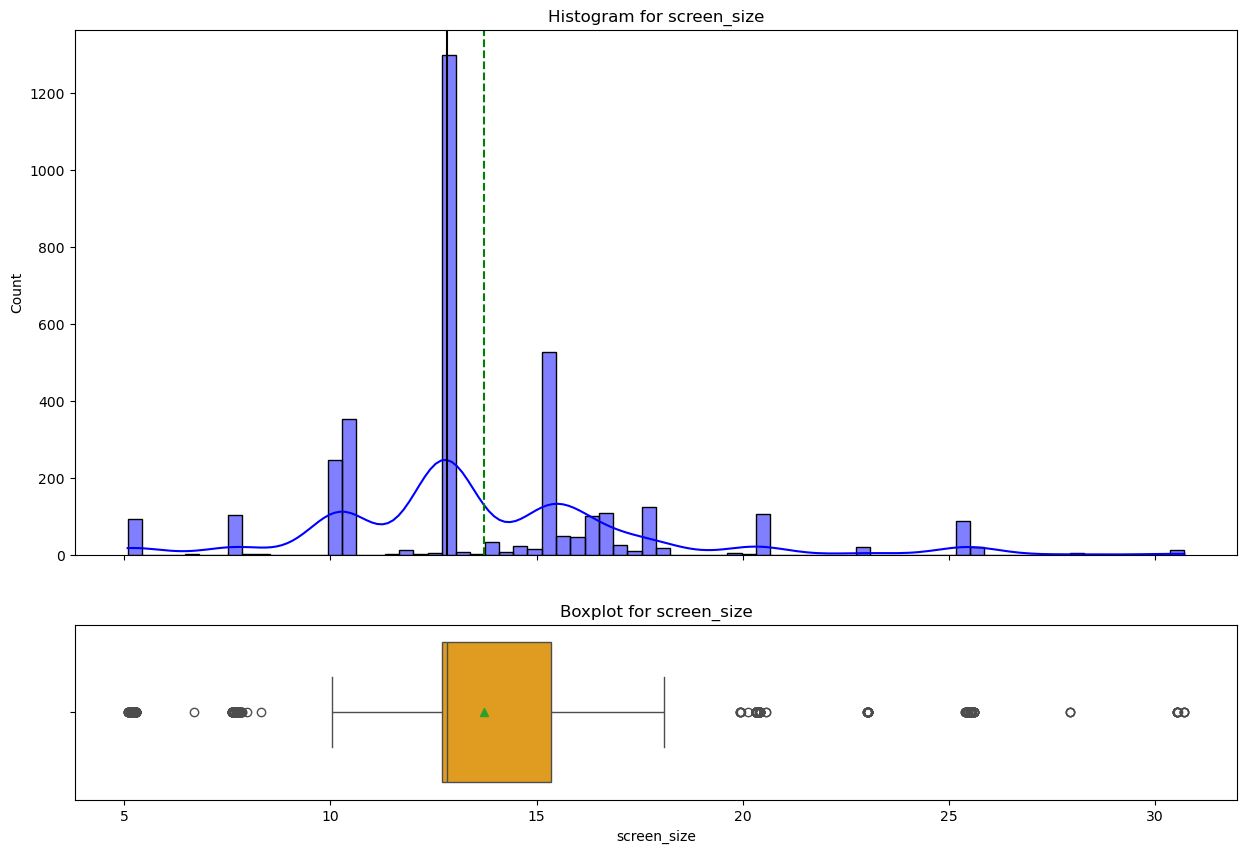

In [2483]:
#call the function to plot histogram and box for column screen_size
univariate_analysis_for_numCols(data,'screen_size')

**Functions to check value_counts**

In [2485]:
def value_count_check(df,cols):
    unique_count=df[cols].nunique() 
    value_info=df[cols].value_counts().head(n=10)                      #provide count group by unique value in column
    value_info_perc=df[cols].value_counts(normalize=True).head(n=10)    #provide percentwise count result

    #print the results
    print(cols,'unique value:' ,'\n', unique_count)
    print(50 * '-')
    print(cols ,'value count:','\n', value_info)
    print(50 * '-')
    print(cols ,'value percent:','\n',value_info_perc)
    

In [2486]:
#call the functions for basic validations
value_count_check(data,'screen_size')

screen_size unique value: 
 142
--------------------------------------------------
screen_size value count: 
 screen_size
12.70    575
12.83    409
10.29    219
10.16    188
15.24    129
12.75    117
17.78    113
12.88    112
10.34    110
20.32     90
Name: count, dtype: int64
--------------------------------------------------
screen_size value percent: 
 screen_size
12.70    0.166474
12.83    0.118413
10.29    0.063405
10.16    0.054430
15.24    0.037348
12.75    0.033874
17.78    0.032716
12.88    0.032426
10.34    0.031847
20.32    0.026057
Name: proportion, dtype: float64


**Observation:**

- *There are `lots of outliers present on both the ends`, indicating screen_size vary from smaller size of 5cm to larger of approx 31cm*.
- *`12.7 cm` is the most preferred devices screen size with `frequency of (575)` followed by 12.83 cm (409 frequency), suggesting a smaller screen             smartphones and most commonly sold here.*
- *`Average screen size` is `higher than median value` (50%) suggesting `right skewness` and outliers at the higher ends.*
- *`Multiple peaks` indicate multiple groups/category like smaller/larger screen smartphones or tablets*.
- *`50% (interquartile range)` of screen size lies in the range of `12.7-15.34 cm`*.
  

**`main_camera_mp`**

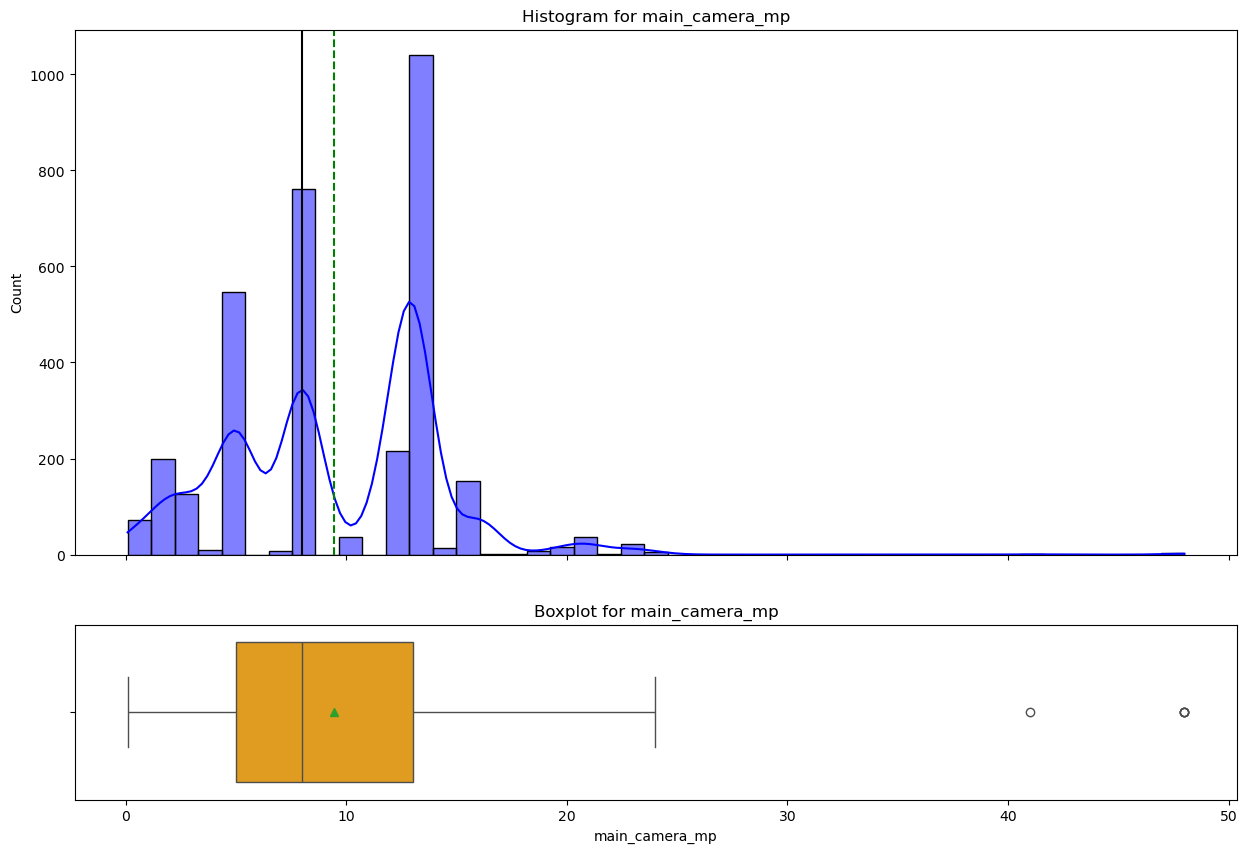

In [2489]:
#call the function to plot histogram and box for column main_camera_mp
univariate_analysis_for_numCols(data,'main_camera_mp')

In [2490]:
#call the functions to get unique value count
value_count_check(data,'main_camera_mp')

main_camera_mp unique value: 
 41
--------------------------------------------------
main_camera_mp value count: 
 main_camera_mp
13.00    1035
8.00      755
5.00      546
12.00     189
2.00      171
16.00     154
3.15      122
0.30       69
10.50      30
1.30       26
Name: count, dtype: int64
--------------------------------------------------
main_camera_mp value percent: 
 main_camera_mp
13.00    0.316031
8.00     0.230534
5.00     0.166718
12.00    0.057710
2.00     0.052214
16.00    0.047023
3.15     0.037252
0.30     0.021069
10.50    0.009160
1.30     0.007939
Name: proportion, dtype: float64


**Observation:**

- *The `average resoultion` of rear camera is `higher than median` value, indicating `positive right skew data`*
- *`Few outliers` are present on the `higher side`, suggesting few devices provides very high main camera resolutions(48 megapixels) to attract customers     for high quality photos.*
- *`50 percent(interquatile range)` of devices have rear camera resolution `ranging from 5 to 13 megapixels`,indicating standards set for mid range phone.*
- *The `maximum and minimum resolution` ranging from `.08 to 48 mp` indicates that devices ranges from `old basic low budget(phones/tablets) to high-end smartphones.`*
- *`Multiple peaks` indicates multiple groups/category like smaller/larger resolutions devices*.

**`selfie_camera_mp`**

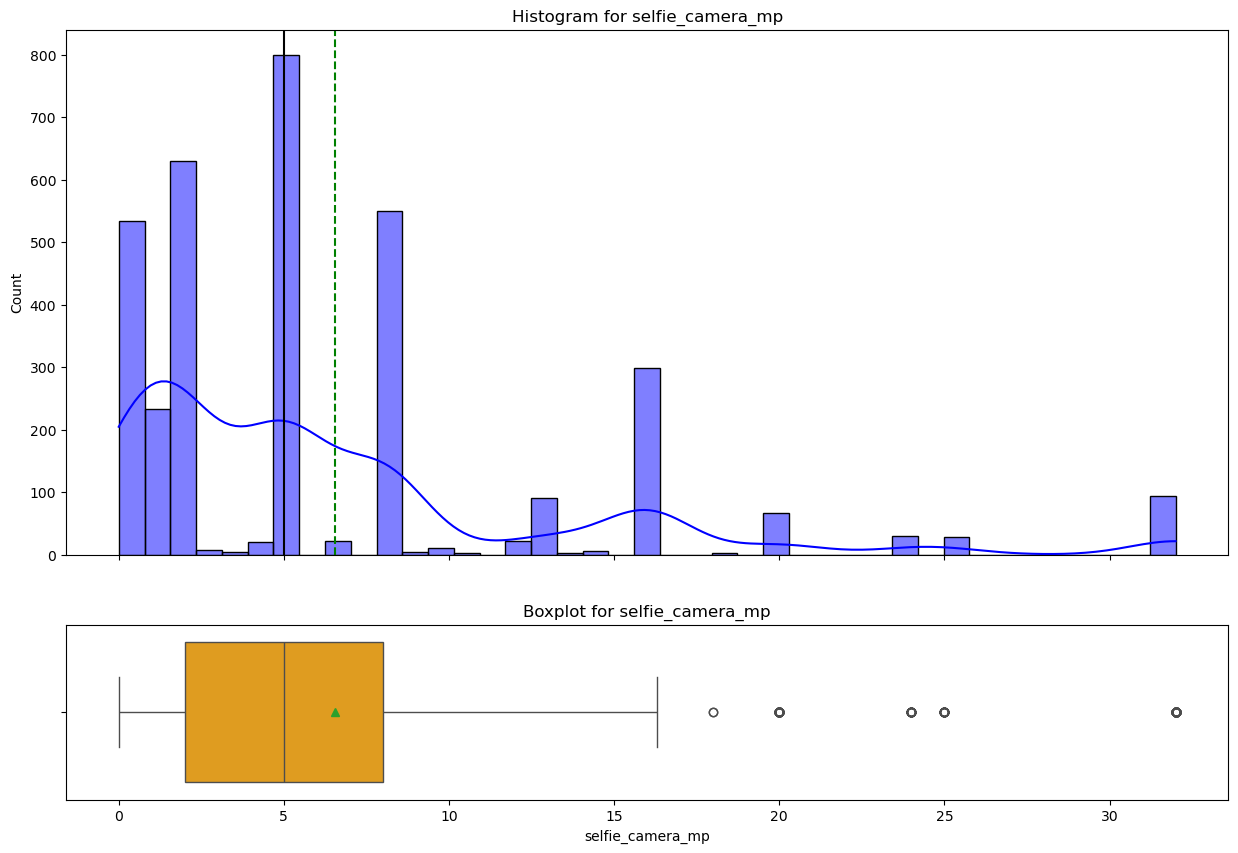

In [2493]:
#call the function to plot histogram and box for column selfie_camera_mp
univariate_analysis_for_numCols(data,'selfie_camera_mp')

In [2494]:
#call the functions to get unique value count
value_count_check(data,'selfie_camera_mp')

selfie_camera_mp unique value: 
 37
--------------------------------------------------
selfie_camera_mp value count: 
 selfie_camera_mp
5.0     791
8.0     549
2.0     538
0.3     492
16.0    298
1.3     148
32.0     94
13.0     90
20.0     67
1.2      43
Name: count, dtype: int64
--------------------------------------------------
selfie_camera_mp value percent: 
 selfie_camera_mp
5.0     0.229143
8.0     0.159038
2.0     0.155852
0.3     0.142526
16.0    0.086327
1.3     0.042874
32.0    0.027231
13.0    0.026072
20.0    0.019409
1.2     0.012457
Name: proportion, dtype: float64


**Observation:**

- *The `average resoultion(6.5 mp)` of rear camera is `higher than median (5 mp)` value, indicating `positive right skew data`*
- *`Few outliers` are present on the `higher side`, suggesting few devices provides very high selfie camera resolutions(32 megapixels) to attract
  customers for sharper and detailed images.*
- *`Average resolution of front camera` of the devices are around `6.5 mp` which typically falls between `50% to 75% `of data*.
- *`50% of devices `have front camera resolution in the `2-8 megapixels range`, indicating affordable and used by most.*

**`int_memory`**

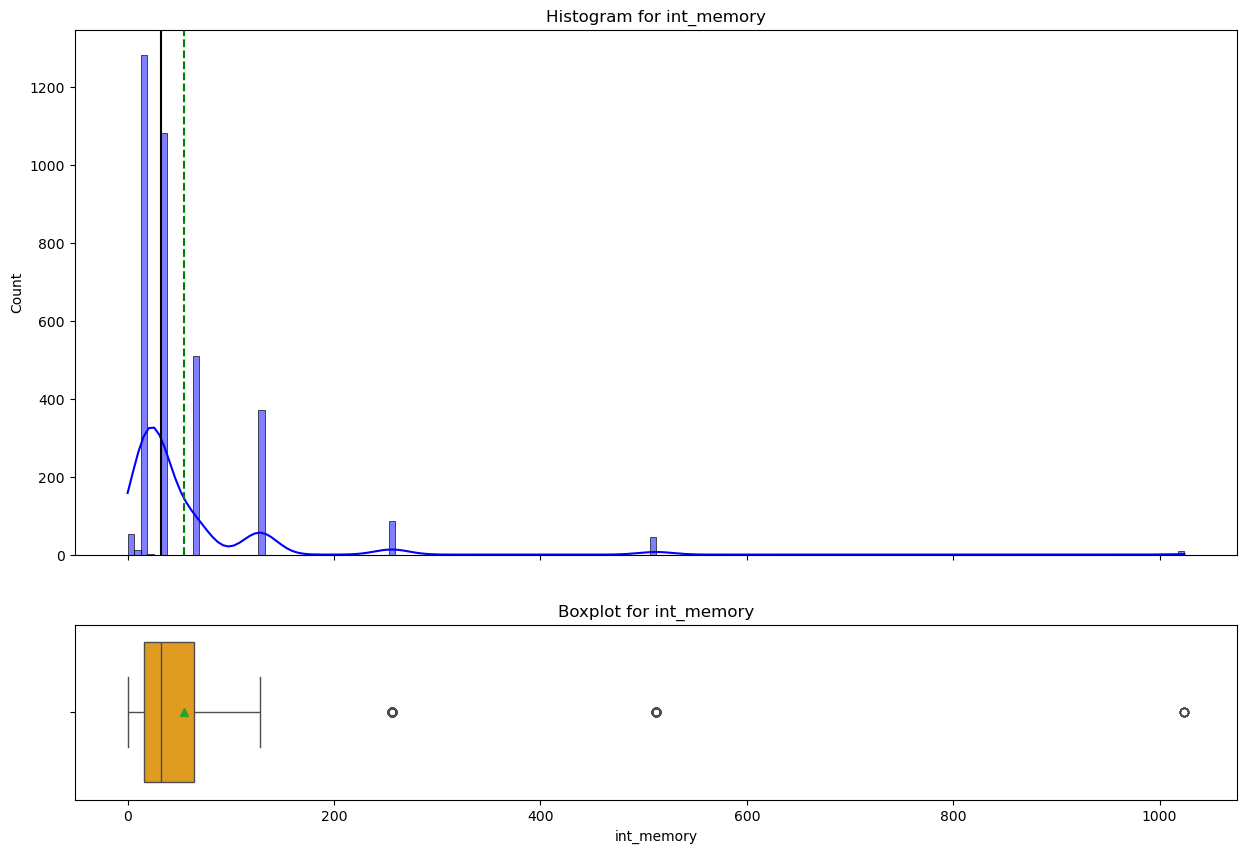

In [2497]:
#call the function to plot histogram and box for column int_memory
univariate_analysis_for_numCols(data,'int_memory')

In [2498]:
#call the functions to get unique value count
value_count_check(data,'int_memory')

int_memory unique value: 
 15
--------------------------------------------------
int_memory value count: 
 int_memory
16.00     1283
32.00     1083
64.00      509
128.00     372
256.00      86
512.00      44
0.06        18
0.10        17
8.00        12
4.00        10
Name: count, dtype: int64
--------------------------------------------------
int_memory value percent: 
 int_memory
16.00     0.371884
32.00     0.313913
64.00     0.147536
128.00    0.107826
256.00    0.024928
512.00    0.012754
0.06      0.005217
0.10      0.004928
8.00      0.003478
4.00      0.002899
Name: proportion, dtype: float64


**Observation:**

- *The `average mean(55 GB) ` is very `high` than `median (32 GB)` and `right skewed` due to `few outliers present at higher end`*
- *`Internal memory` lies between `minimum of 0.01 GB to maximum of 1024 GB`. They are `more spread out` with `standard deviation` of `~85 GB`.*
- *Few outliers present at higher end suggest devices providing higher internal memory space.*
- *`50% of devices` have internal memory in the range `16-64 GB`.*
- *`Multimodal` due to multiple peaks suggesting multiple groups/segment range*.


**`ram`**

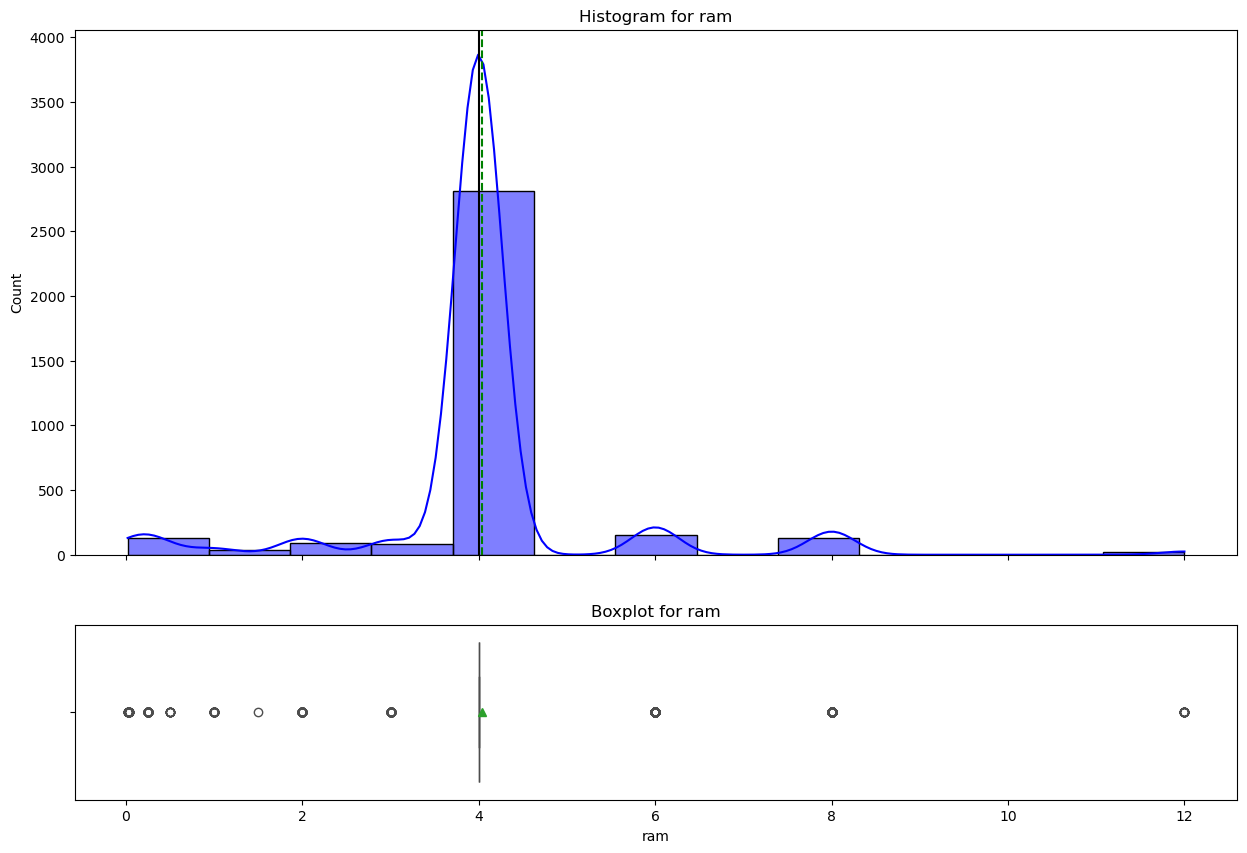

In [2501]:
#call the function to plot histogram and box for column ram
univariate_analysis_for_numCols(data,'ram')

In [2502]:
#call the functions to get unique value count
value_count_check(data,'ram')

ram unique value: 
 12
--------------------------------------------------
ram value count: 
 ram
4.00     2815
6.00      154
8.00      130
2.00       90
0.25       83
3.00       81
1.00       34
12.00      18
0.02       18
0.03       17
Name: count, dtype: int64
--------------------------------------------------
ram value percent: 
 ram
4.00     0.815942
6.00     0.044638
8.00     0.037681
2.00     0.026087
0.25     0.024058
3.00     0.023478
1.00     0.009855
12.00    0.005217
0.02     0.005217
0.03     0.004928
Name: proportion, dtype: float64


**Observation:**

- *`Average mean and median` value of device is approx `same (4 GB)` and most of the `data are centred around it's central value.`*
- *The `outliers are present` on the both ends, making the `whiskers non-existents.`*
- *`50% `of interquartile range have `same single point ram value(4 GB)` i.e all values identical or very close to the median and no spread in IQR*

**`weight`**

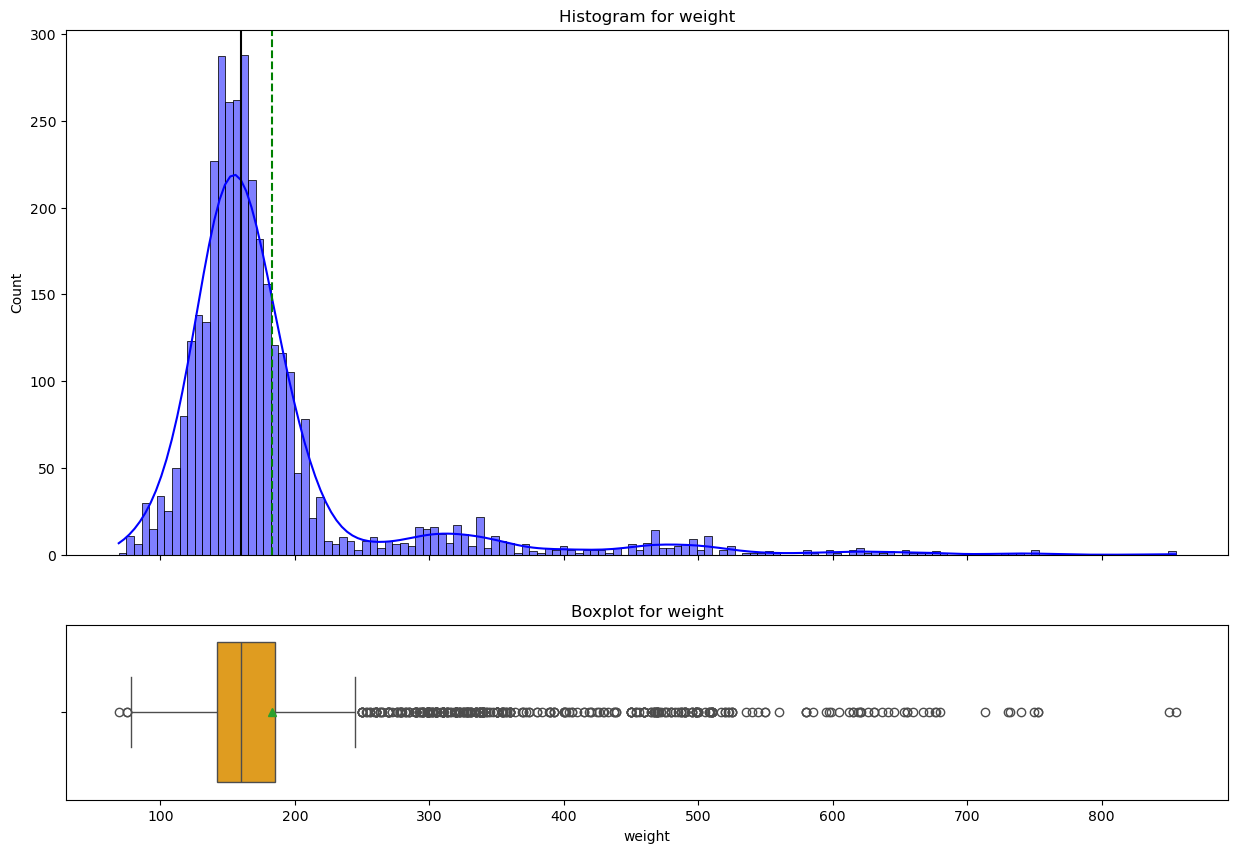

In [2505]:
#call the function to plot histogram and box for column weight
univariate_analysis_for_numCols(data,'weight')

**Observation:**

- *`The average weight` of the devices in `grams` is approx `182` and lies nearly at Q3 quartile range.*
- *The `huge difference` in `maximum and maximum weights` of a devices indicate the website offers variety of devices, ranging from small light basic phone to heavier High-end smartphones or Tablets/Ipad.*
- *There are `lots of outliers` present on `higher end` making the data `heavily right skewed`.*
- *There are `few outliers present at lower end` close to whisker.*
  

**`battery`**

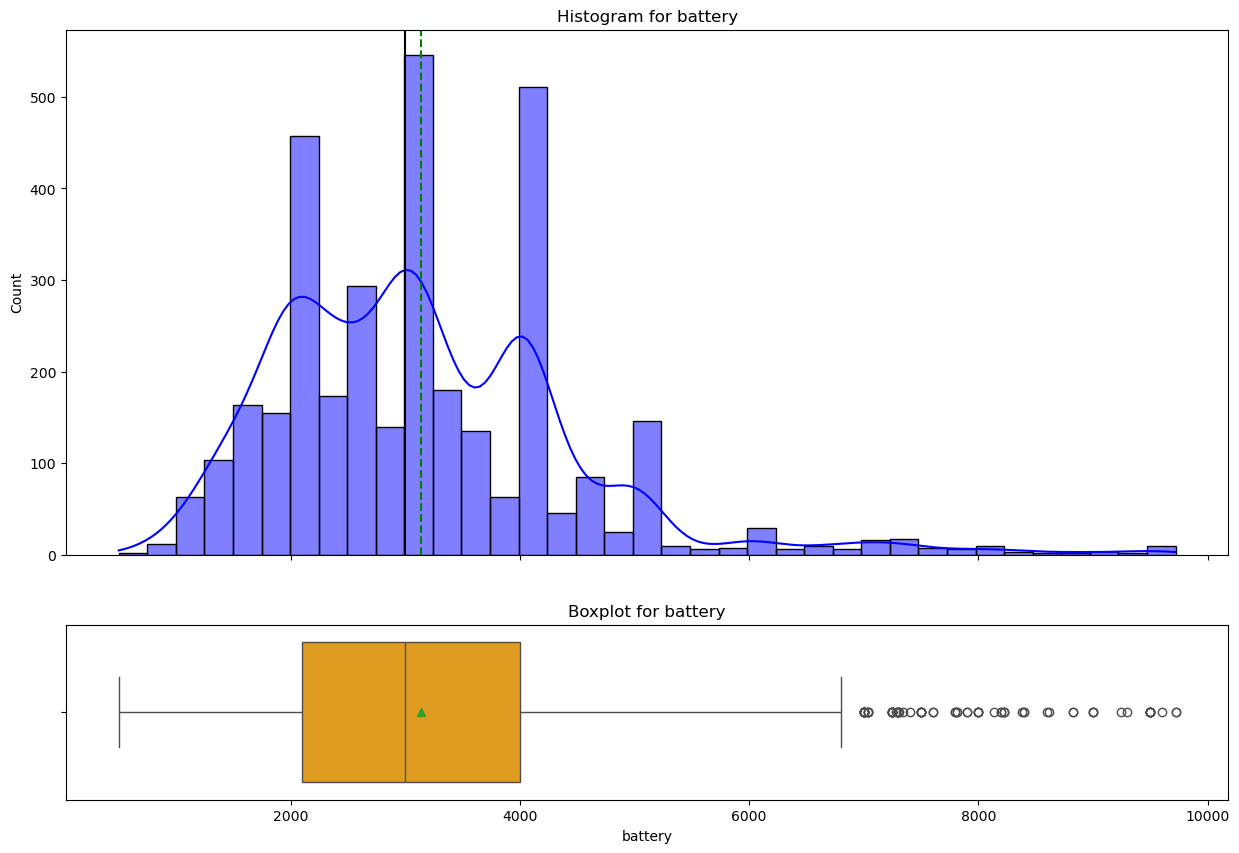

In [2508]:
#call the function to plot histogram and box for column battery
univariate_analysis_for_numCols(data,'battery')

**Observation:**

- *There are `lots of outliers` present on `higher end` making the data `heavily right skewed`.*
- *There is `huge variation(sd=1299.68)` in battery capacity ranging from `500.00(min) to 9720.00 mAh(max).`*
- *`50% of devices` have battery capacity in the range `2100- 4000 mAh`.*
  

**`days_used`**

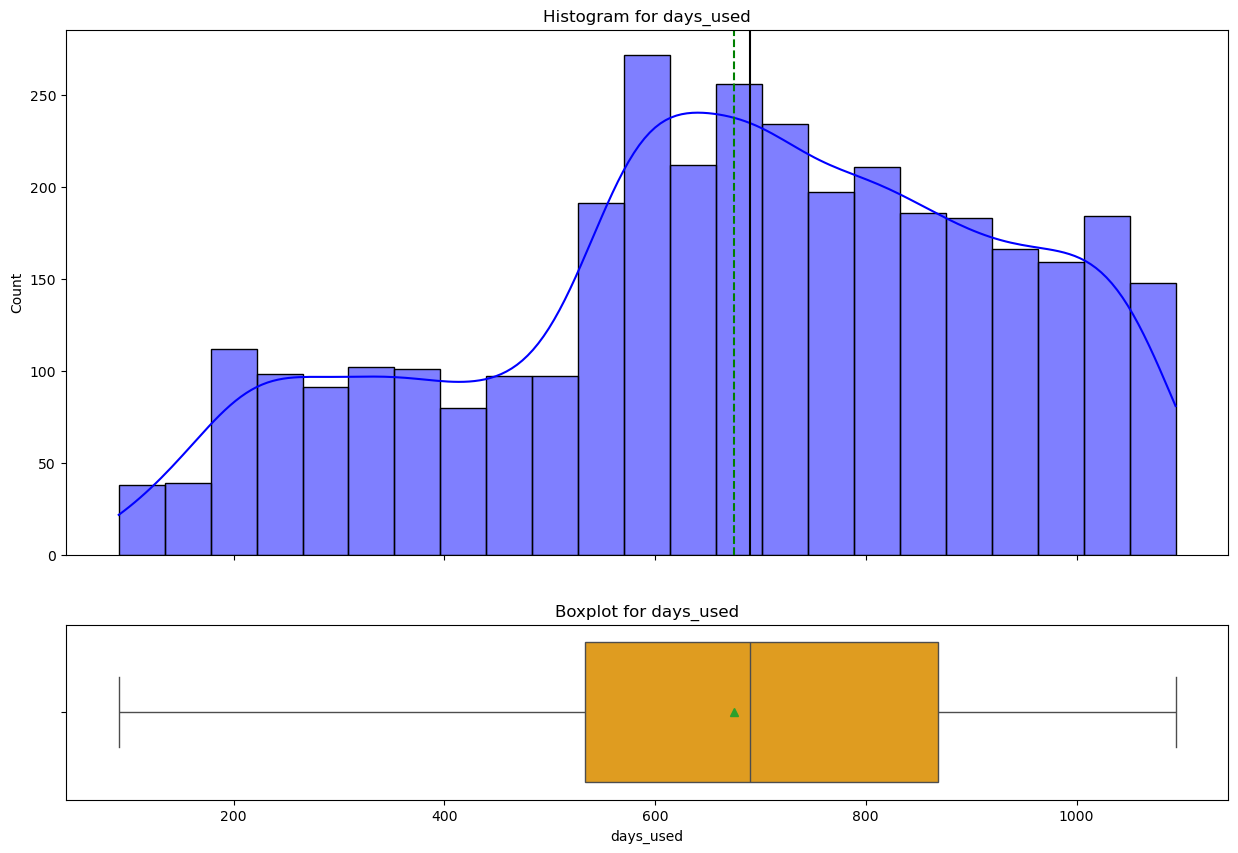

In [2511]:
#call the function to plot histogram and box for column days_used
univariate_analysis_for_numCols(data,'days_used')

In [2512]:
#call the functions to get unique value count
#value_count_check(data,'days_used')

**Observation:**

- *`No outliers` present and data is slightly left skewed`.*
- *`Mean` is `little less` than `median` and are almost close to each other.*
- *The `minimum and maximum` number of days a refurbished/used devices has been used are `91 and 1094 days resp`.*
- *On an `average` the typical days, a devices are used is around `675 days(approx 3 year)`.*
  

**`normalized_used_price`**

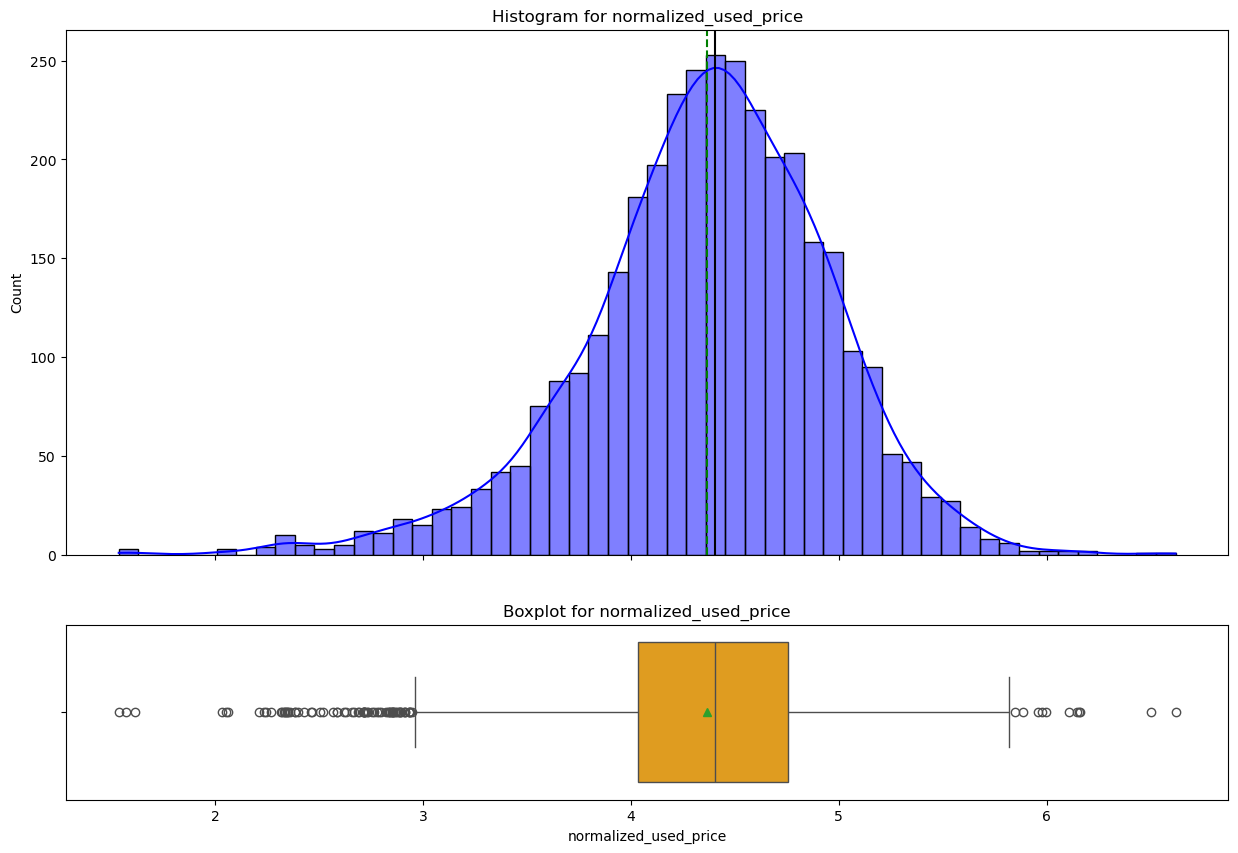

In [2515]:
#call the function to plot histogram and box for column normalized_used_price
univariate_analysis_for_numCols(data,'normalized_used_price')

**Observation:**

- *`Outliers` are present on the both end and data looks `similar to normal distribution with slight negative left skewness`.They also suggest few devices prices are high due to additional features like resolution,size,weight etc*.
- *`Mean is little less than median` and are `almost close to each other`.*
- *The `average normalized price of the used`/refurbished device in `euros` is around `4` with `minimum of 1.5`, indicating less spread in data*
- *`50% `of devices used price lies in the range from (4- 4.7 euros),indicate a budget and most affordable devices range.*
- *Most of the `outliers` are present on lower end.*
  
  

**`normalized_new_price`**

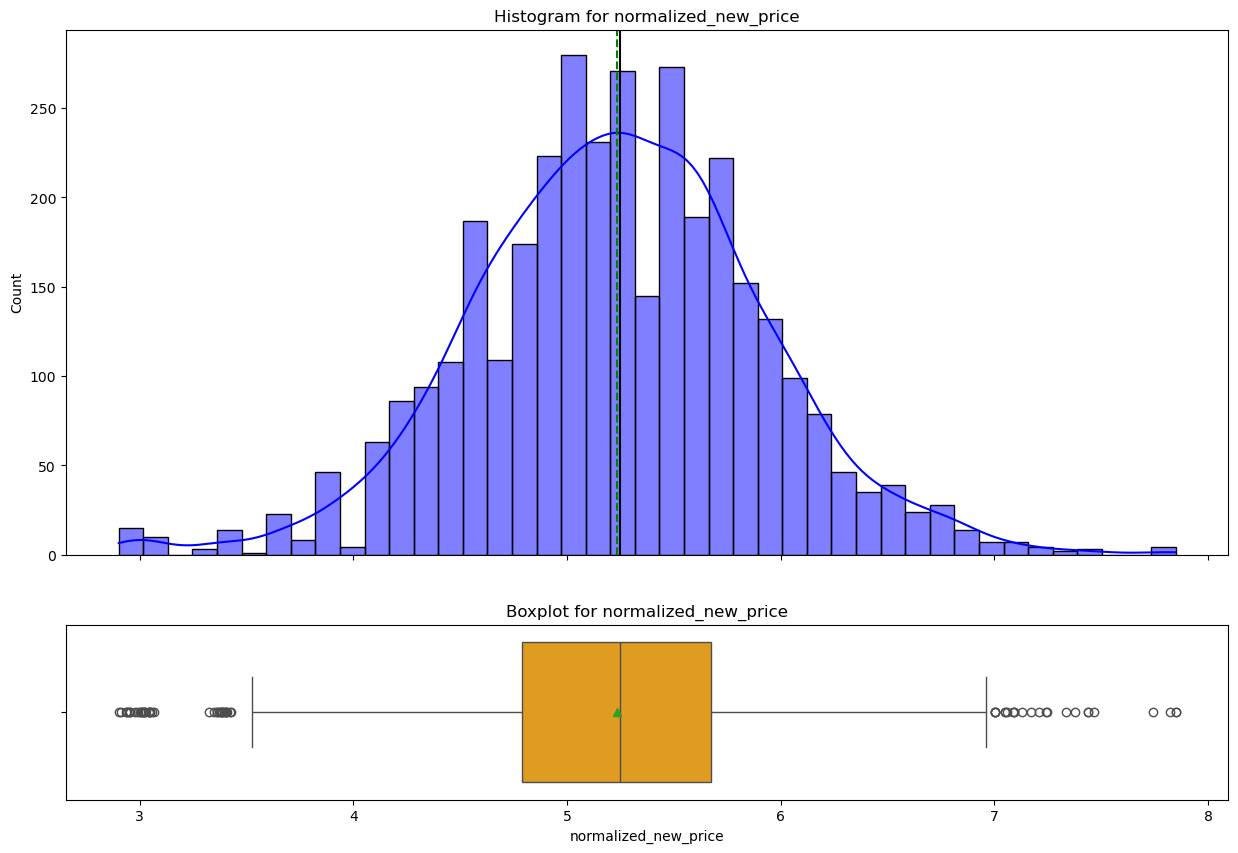

In [2518]:
#call the function to plot histogram and box for column normalized_new_price
univariate_analysis_for_numCols(data,'normalized_new_price')

**Observation:**

- *`Outliers` are present on the both end and data looks `similar to normal distribution`.They also suggest few devices prices are high due to additional features like resolution,size,weight etc*
- *`Mean and median` are almost same (5.2 euros).*
- *The `average normalized price of the used`/refurbished device in `euros` is around `5.2 euros` with `minimum of 2.9` and `max of 7.8 euros`*.
- *`50% of new devices` for same model has price in the range from (4.7- 5.6 euros)*.
  

**Function for categorical column**

In [2521]:
#create a function to plot bar plot for categorical columns 
def univariate_analysis_for_catgCols(df,column_name, perc=False, n=None):

    """
    df: dataframe 
    column_name: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = df.shape[0]   #total number of rows
    count = df[column_name].nunique()  # number of unique values in the column    
    
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    #create bar plot
    plt.xticks(rotation=90, fontsize=15)    
    plt.title(f'Bar graph for {column_name}')
    plt.xlabel(f'{column_name}')
    ax = sns.countplot(data = df,x = column_name,  order = df[column_name].value_counts().index[:n], hue = column_name)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    
    plt.show()  # show the plot

**`brand_name`**

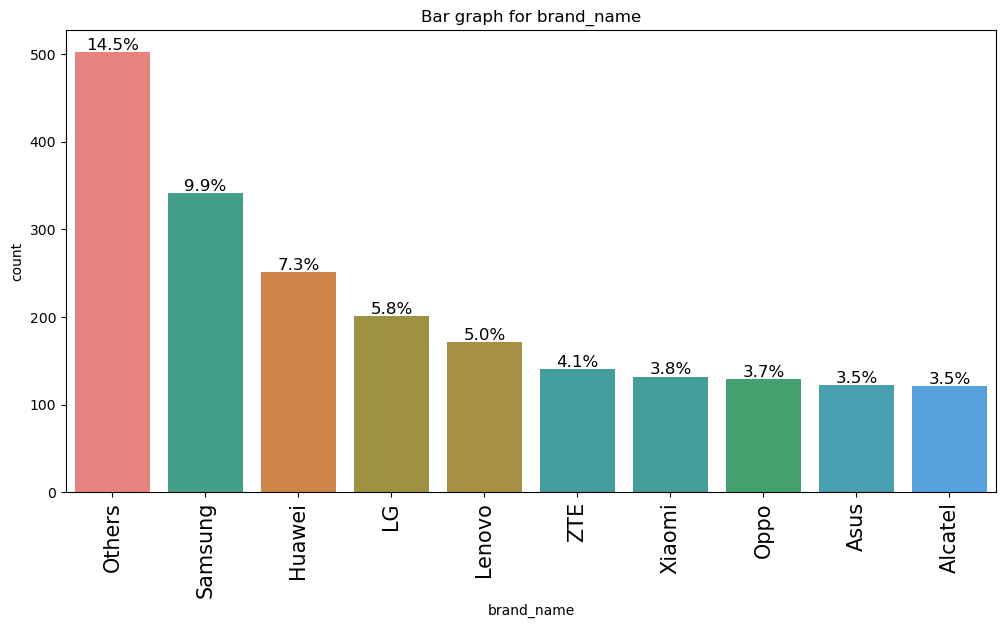

In [2523]:
#call the function to plot bar plot for column brand_name
univariate_analysis_for_catgCols(data,'brand_name',perc=True,n=10)

In [2524]:
#call the functions to get unique value count
value_count_check(data,'brand_name')

brand_name unique value: 
 34
--------------------------------------------------
brand_name value count: 
 brand_name
Others     502
Samsung    341
Huawei     251
LG         201
Lenovo     171
ZTE        140
Xiaomi     132
Oppo       129
Asus       122
Alcatel    121
Name: count, dtype: int64
--------------------------------------------------
brand_name value percent: 
 brand_name
Others     0.145339
Samsung    0.098726
Huawei     0.072669
LG         0.058193
Lenovo     0.049508
ZTE        0.040533
Xiaomi     0.038217
Oppo       0.037348
Asus       0.035321
Alcatel    0.035032
Name: proportion, dtype: float64


**Observation:**

- *There are `34 unique brand name` with `502 brand names not listed` and falls under `Others` category, accounting for 14.5% of data*
- *The next most preferred known brands are `Samsung(341) followed by Huawei(251) and LG(201)` occupying approx `23 percent` of market data.Looks like trade-in is more popular and high in these brands*


**`os`**

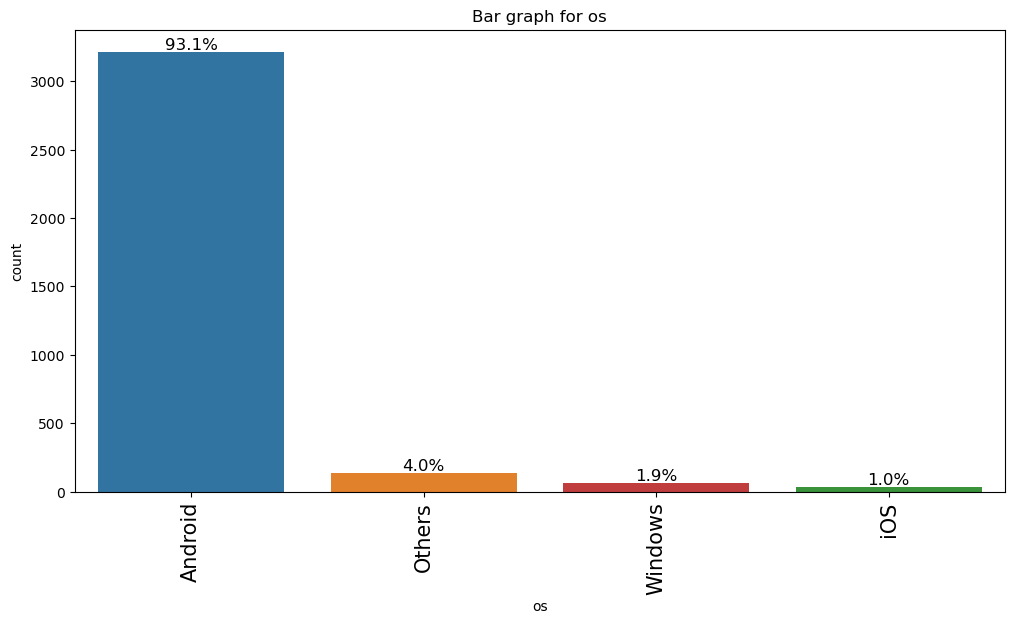

In [2527]:
#call the function to plot bar plot for column os
univariate_analysis_for_catgCols(data,'os',perc=True,n=10)

In [2528]:
#call the functions to get unique value count
value_count_check(data,'os')

os unique value: 
 4
--------------------------------------------------
os value count: 
 os
Android    3214
Others      137
Windows      67
iOS          36
Name: count, dtype: int64
--------------------------------------------------
os value percent: 
 os
Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: proportion, dtype: float64


**Observation:**

- *There are `4 unique` OS system `Android, Windows,iOS ` and few os falls under category `Others`*
- *The most common os used in the devices(3214) are `Android` comprising almost `93% `of market data.*
- *`Others, Windows(2.0),iOS (1.0)` together occupies only `~ 7 percent.` of data*


**`4g`**

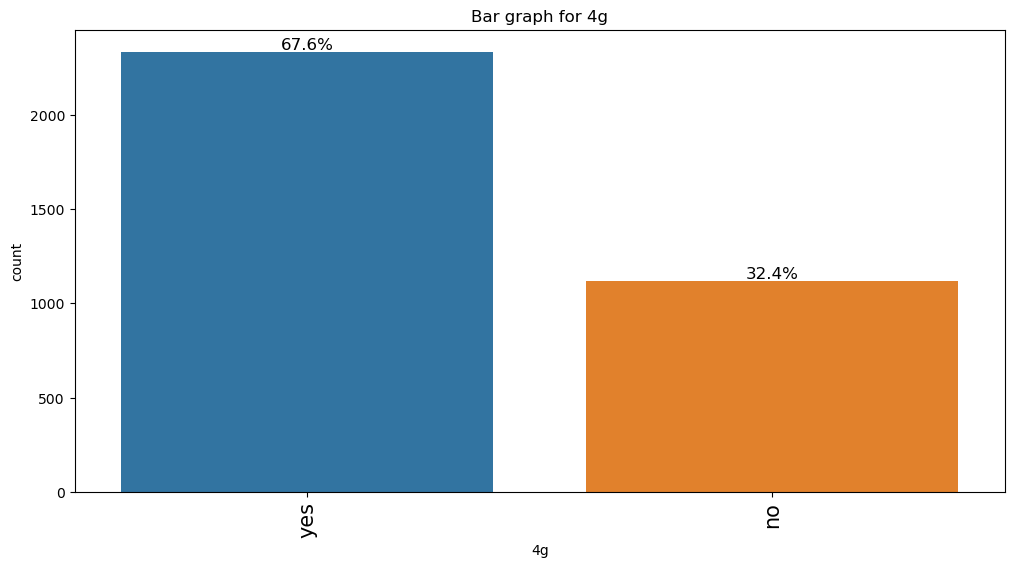

In [2531]:
#call the function to plot bar plot for column 4g
univariate_analysis_for_catgCols(data,'4g',perc=True,n=10)

In [2532]:
#call the functions to get unique value count
value_count_check(data,'4g')

4g unique value: 
 2
--------------------------------------------------
4g value count: 
 4g
yes    2335
no     1119
Name: count, dtype: int64
--------------------------------------------------
4g value percent: 
 4g
yes    0.676028
no     0.323972
Name: proportion, dtype: float64


**Observation:**

- *It has `two unique` value `yes or no`, i.e there are `2335 devices` which support 4g and accounts for `approx 68% of market data`.*
- *`Few devices do not support 4g,` suggesting either they are old generation devices or swithched to 5g, we need more data and dig in more have proper conclusions.*

**`5g`**

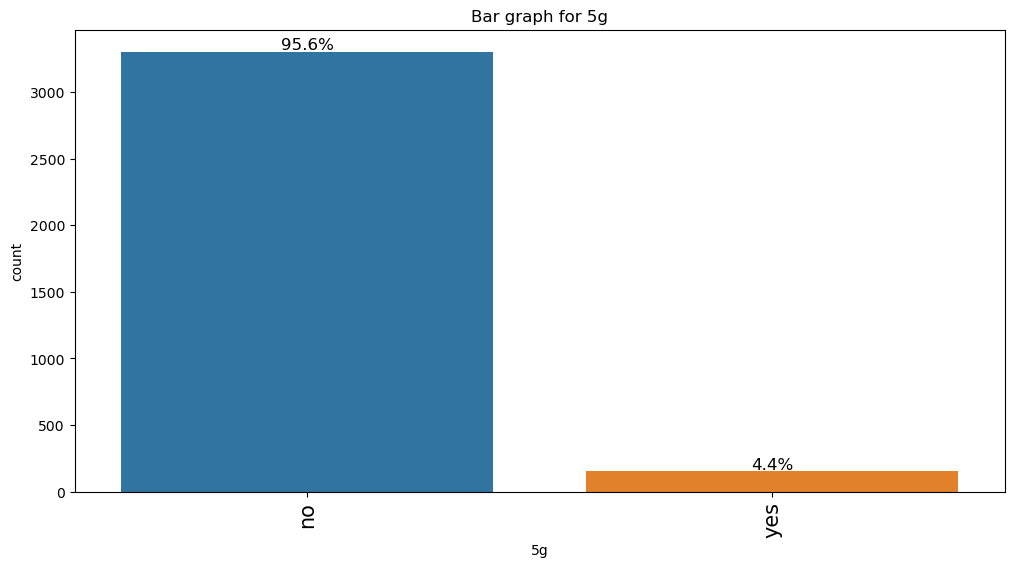

In [2535]:
#call the function to plot bar plot for column 5g
univariate_analysis_for_catgCols(data,'5g',perc=True,n=10)

In [2536]:
#call the functions to get unique value count
value_count_check(data,'5g')

5g unique value: 
 2
--------------------------------------------------
5g value count: 
 5g
no     3302
yes     152
Name: count, dtype: int64
--------------------------------------------------
5g value percent: 
 5g
no     0.955993
yes    0.044007
Name: proportion, dtype: float64


**Observation:**

- *There are `few devices` which support 5g but their percentage is very low around `4 percent`*.
- *About `96 percent` of devices `do not have 5g`, indicating either the device belongs to old generation or not provided in the current area/locations.*
- *They are represented as `yes or no`.*

**`release_year`**

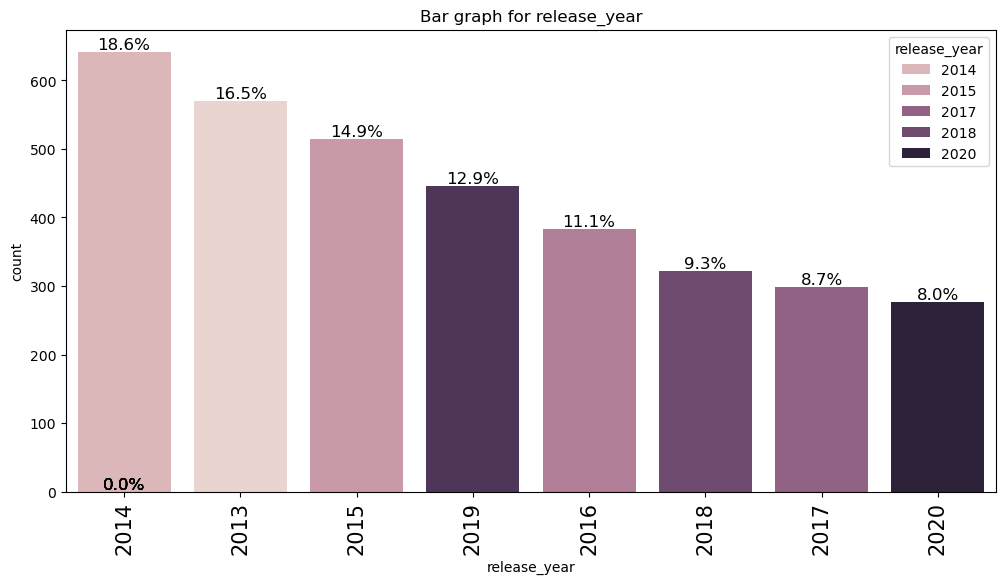

In [2539]:
#call the function to plot bar plot for column release_year
univariate_analysis_for_catgCols(data,'release_year',perc=True,n=10)

In [2540]:
#call the functions to get unique value count
value_count_check(data,'release_year')

release_year unique value: 
 8
--------------------------------------------------
release_year value count: 
 release_year
2014    642
2013    570
2015    515
2019    446
2016    383
2018    322
2017    299
2020    277
Name: count, dtype: int64
--------------------------------------------------
release_year value percent: 
 release_year
2014    0.185871
2013    0.165026
2015    0.149102
2019    0.129126
2016    0.110886
2018    0.093225
2017    0.086566
2020    0.080197
Name: proportion, dtype: float64


**Observation:**

- *The `release year `for the devices ranges from `2013 to 2020`.*
- *Highest number of the devices belong to `release year 2014(642 devices), followed by 2013(570 devices) and 2015(515 devices),` accounting appox `50% ` of devices*

### Bivariate Analysis


#### Heat map to find correlation between numerical columns

In [2544]:
#Create a list of all numericals columns
num_col_name=['screen_size','main_camera_mp','selfie_camera_mp',
          'int_memory','ram','battery','weight','days_used','normalized_new_price','normalized_used_price']

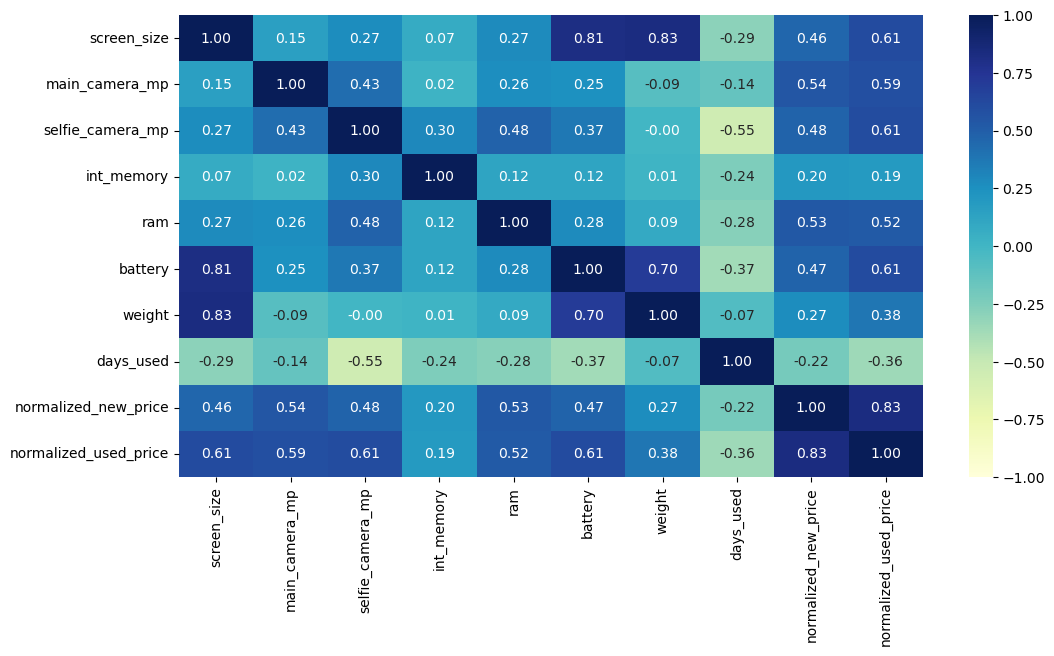

In [2545]:
#calculate the correlation between numerical columns
df_corr=data[num_col_name].corr()
df_corr

#plot the map
plt.figure(figsize=(12,6))
sns.heatmap(data=df_corr, cmap='YlGnBu',annot=True,vmin=-1, vmax=1,fmt=".2f")
plt.show();

**Observation:**


-  *We can see `strong positive correlation between screen_size` with respect to `weight (.83) ` and `battery (.81) `, which is as expected. Bigger the screen_size ,more heavier it will be and requires larger size battery to support additional advance features.*
- *`Moderate positive correlation` between `screen_size and normalized_used_price(.61)` but slightly `less linearly correlated` with `normalized_new_price (.46)`.*
- *`selfie_camera_mp, ram` are `less positively correlated` and indicate screen_size does not affect much the resolution of rear and front camera.*
  
- *`main_camera_mp,int_memory` do not have much effect on `screen_size`.*
  
- *`days_used` is `negatively correlated` with all the columns. Showing `moderate negative correlation` with respect to `selfie_camera_mp(-.55)` and `least` with `weight(-.07)`.which seems to be fine,as in the older the devices the camera resolution tends to reduce or degrade.*
  
- *The `normalised_used_price` will also decrease as the `devices get older`(i.e day_used is more)*
  
- *`normalised_used_price` shows `strong positive correlations` with `normalized_new_price(.83)` i.e if the price of same model is high then used/refurbished will also be high.*
- *`normalised_used_price` shows `strong positive correlation` with respect to `front and rear camera, battery`, higher the resoultion more expensive is the devices. It also shows moderately positive correlation with ram*.
  
- *`battery` is strongly positively correlated with `weight and screen_size`.Larger batteries requires more space and also increase the weight of the devices.*

#### Questions

#### Q1. What does the distribution of normalized used device prices look like?

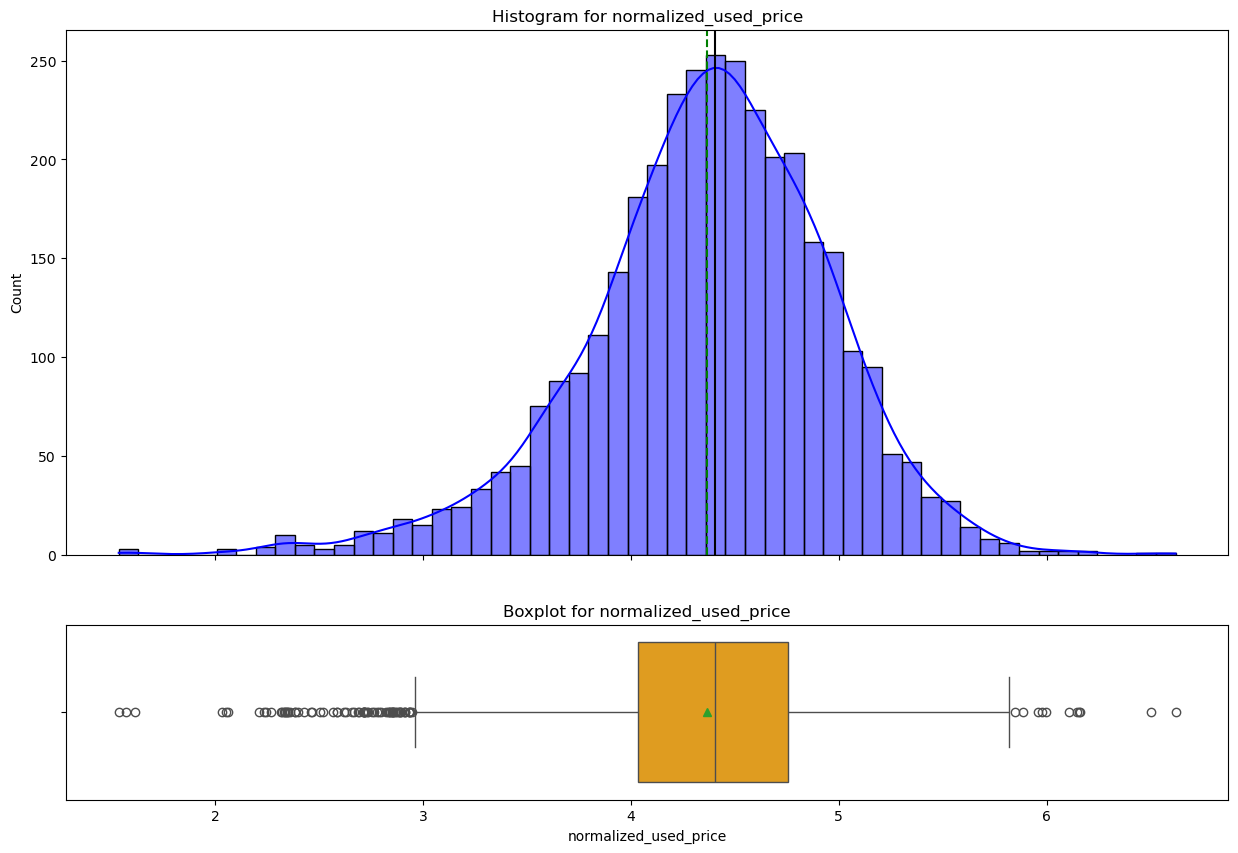

In [2550]:
#call the function to plot histogram and box for column normalized_used_price
univariate_analysis_for_numCols(data,'normalized_used_price')

**Observation:**
- *From the above plot we can say that the data looks `similar to that of normal distribution` except for `little skewness present on left side` of tail due to `presence of outliers`.*
- *The `Mean` is slightly less than `median` and are `almost close` to each other.*
- *The `spread is less` and most of the data is `centered around the central tendency`. 50% of devices used price lies in the range from (4- 4.7 euros).*
  

#### Q2. What percentage of the used device market is dominated by Android devices?

In [2553]:
#total number of devices under each os
data['os'].value_counts()

os
Android    3214
Others      137
Windows      67
iOS          36
Name: count, dtype: int64

In [2554]:
data_os_dom=data['os'].value_counts(normalize=True).head(n=1)
data_os_dom

os
Android    0.930515
Name: proportion, dtype: float64

**Observation**

- *There are `3214 used devices` dominated by `Android devices` and accounts for `93.05%`*

**normalized_used_price vs os**

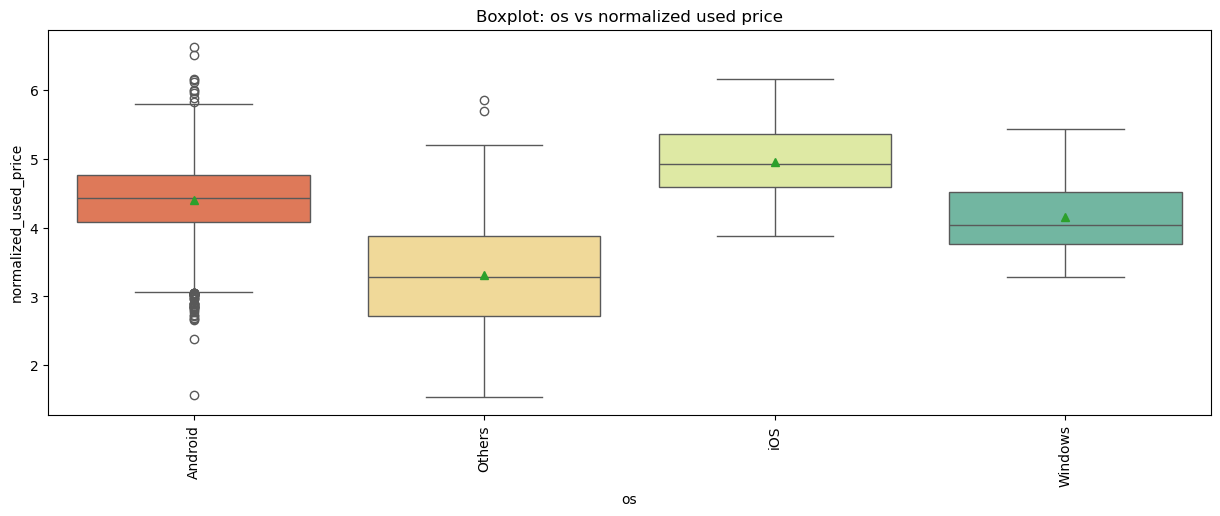

In [2557]:
#Let's check how the prices vary for used phones and tablets across different os
plt.figure(figsize=(15, 5))
plt.title('Boxplot: os vs normalized used price')
sns.boxplot(data=data, x='os', y='normalized_used_price',palette = 'Spectral', hue='os',showmeans=True)
plt.xticks(rotation=90)
plt.show()

**Observation**
- *The `mean and median` value are almost same and at the center for almost all os*.
- *The `average normalized price` for `ios` is `highest (5 euros)` followed by `Android (4.5 euros)`.*
- *`Outliers are present` in `android` devices, indicating variety of devices offered at very low to high price range.*

#### Q3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

In [2560]:
#get the count of different ram size under each brand
ram_brandwise=data.groupby(['brand_name','ram'])['ram'].count()
ram_brandwise

brand_name  ram 
Acer        1.00      1
            2.00      1
            4.00     49
Alcatel     0.25      7
            0.50      3
                   ... 
ZTE         2.00      3
            3.00      3
            4.00    123
            6.00      5
            8.00      3
Name: ram, Length: 143, dtype: int64

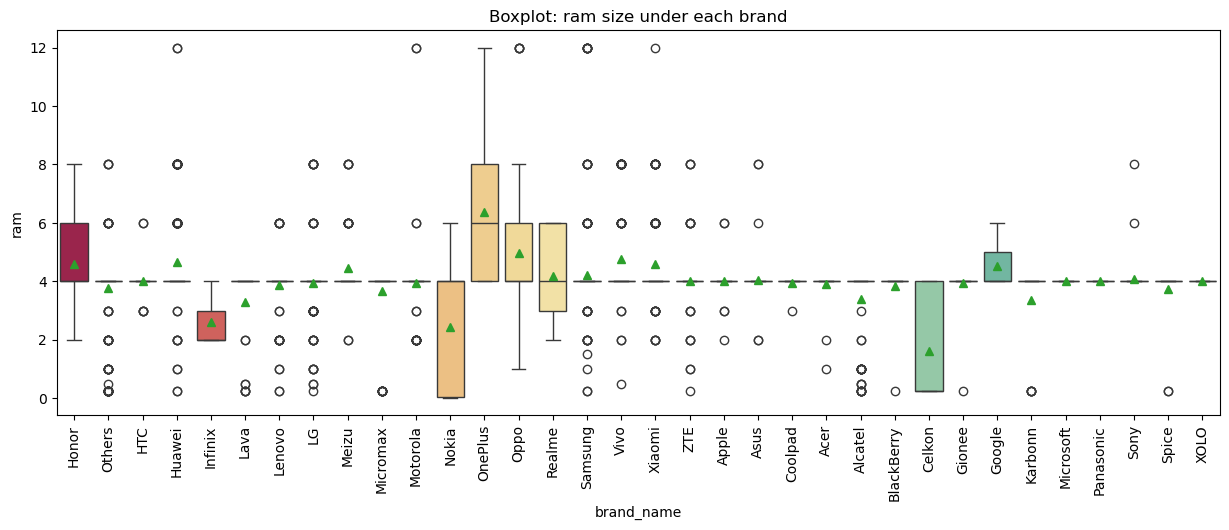

In [2561]:
#plot the boxplot to compare ram size offered by different brand
plt.figure(figsize=(15, 5))
plt.title('Boxplot: ram size under each brand')
sns.boxplot(data=data, x='brand_name', y='ram',palette = 'Spectral', hue = 'brand_name',showmeans=True)
plt.xticks(rotation=90)
plt.show() ;

**Observation:**

- *`Almost 90 % of brand` have `no spread in middle(50%) `interquatile range meaning they have `Q1 and Q3 are almost identical`.( example Samsung,Others, HTC,Huawei,lenovo etc). They have `no visible box` and ram data is centred around 4 GB close to central tendency(mean/median/mode).*
- *There are `variation present` for some of the `brands like Honor,Oneplus,Oppo,and google` in the `interquatile range.` 50% of middle data ranges from 4 GB to to 8GB high (Oneplus)*
- *`Except for few brands` like Honor,Infinix,Nokia,Oneplus,Realme,celkon and google, `outliers are present in all other brands`, suggesting high and low ram sizes available.*
- *`Infinix brand` provide `very less ram rangse(2- 4 GB)` and 75% of devices have ram close to 3 GB.*
- *Brand like `Samsung,Huawei,Motorola,Xiaomi and Oppo` are the `only brands` which offered `very high ram size of 12 GB`.*
- *On an average almost all brands offered 4 GB of ram.*
- *There are few brands like `Celkon,Karbonn,microsoft,spice,infinix,lava,micromax etc` which provides ram size of `4 GB or less.`*


#### Q4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [2564]:
#let create a new dataframe to capture details of devices with large batteries(more than 4500 mAh)
largeBat=data['battery']>4500
df_largeBat1=data[largeBat]
df_largeBat1.shape

(341, 15)

In [2565]:
#total brand offering devices with large batteries(more than 4500 mAh)
df_largeBat1['brand_name'].nunique()

25

In [2566]:
#top 5 brand offering devices with large batteries(more than 4500 mAh)
df_largeBat1['brand_name'].value_counts().head()

brand_name
Samsung    50
Others     41
Huawei     37
Xiaomi     31
Lenovo     28
Name: count, dtype: int64

In [2567]:
df_largeBat1[df_largeBat1['brand_name']=='Apple']['weight'].median()

468.0

In [2568]:
#display the dataframe in sorted order by battery size descending
df_largeBat=data[largeBat].sort_values(by='battery', ascending=False)   #sorting the result by battery


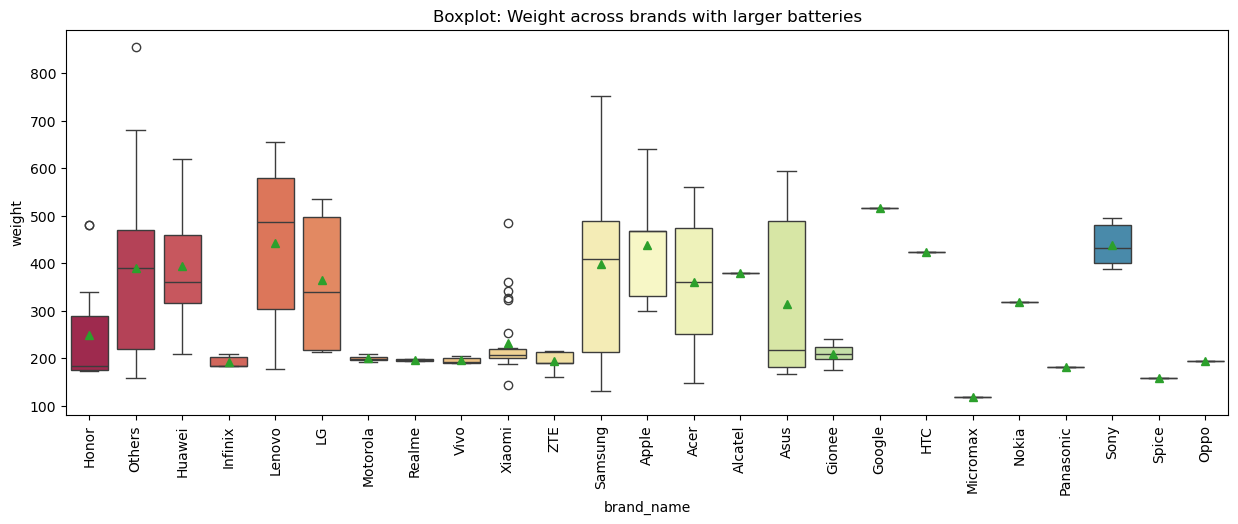

In [2569]:
#lets plot the graph to compare weight across different brand when battery size greater than 4500 mAh
plt.figure(figsize=(15, 5))
plt.title('Boxplot: Weight across brands with larger batteries')
sns.boxplot(data=df_largeBat1, x='brand_name', y='weight',palette = 'Spectral', hue='brand_name',showmeans=True)
plt.xticks(rotation=90)
plt.show()

**Observation:**
- *There are `341 devices with 25 different brands` which offered devices with `large batteries(more than 4500 mAh)`.*
- *`Samsung` offers `50 devices` followed by `Others(41) and Huawei(37)`.*
- *`Micromax offer the lightest phone/tablets` approx `120 grams`, while there is `one device` under brand `'Others'` which `weighs more than 800gm`*
- *`Top 5 brands`(with more number of devices) `except Lenovo` (`Samsung, Others, Huawei, Xiaomi`) have weights in ranges from `200 to 480 grams in IQR`.*
- *`Infinix, Nokia, ZTE, Motorola, Realme, Oppo, Vivo, Panasonic, Micromax , Gionee ,Spice, Alcatel` have fewer devices but offer light weight devices.*
- *`Xiaomi have most number of outliers` mostly at higher end suggesting few devices with more weights.*
- *`On an average` the `weights ranges from 180 to 550 grams` for most of the brands.*
- *Few brands like `Samsung, Others, Acer and sony` has `mean close or equal to median` and are spread out in the IQR.*


#### Q5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [2572]:
#create a new dataframe to capture above condition i.e screen_size > 6
screen_Gr_6=data['screen_size']> (6 * 2.54) #applying filter on screen_size > 6 inches(convert the cm to inches by multiplying it by 2.54)

#New dataframe to store this new filtered data
df_largerScreen=data[screen_Gr_6]

#checking the number of rows and columns to get total number of brand offering devices with screen size >6
df_largerScreen.shape

(1099, 15)

In [2573]:
#total brand offering devices with large batteries(more than 4500 mAh)
df_largerScreen['brand_name'].nunique()

31

In [2574]:
#top 5 brand offering devices with screen_size >6
df_largerScreen['brand_name'].value_counts().head()

brand_name
Huawei     149
Samsung    119
Others      99
Vivo        80
Honor       72
Name: count, dtype: int64

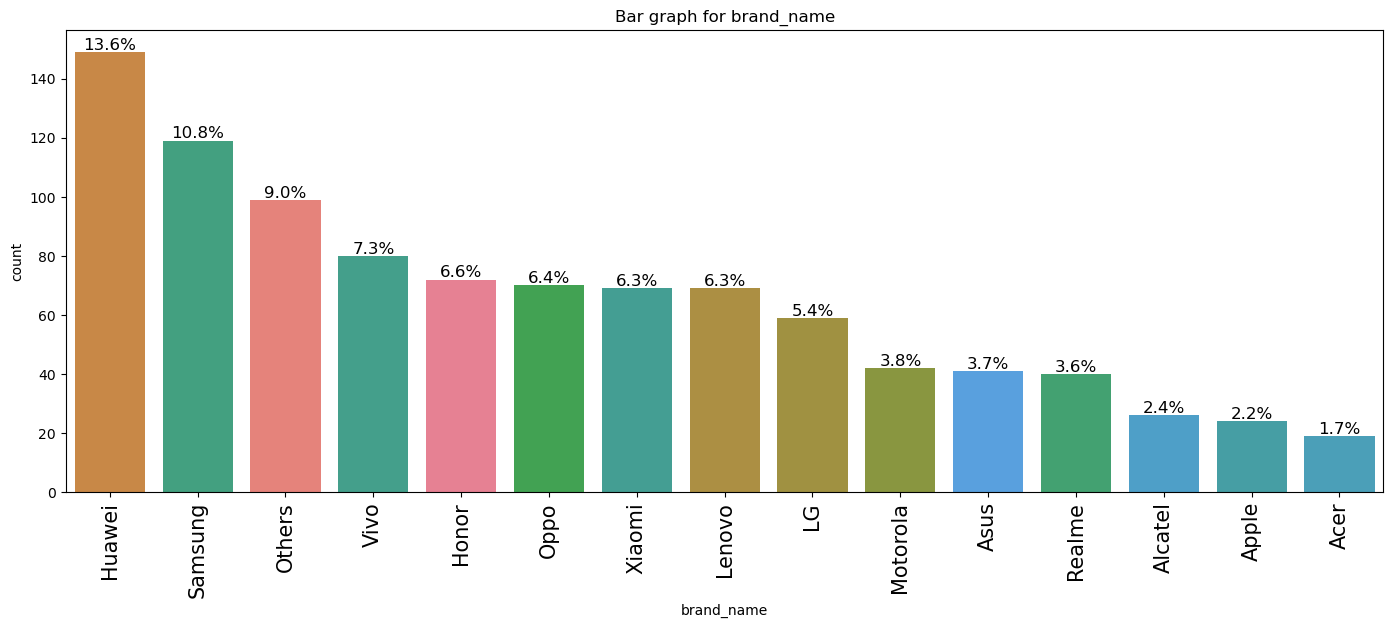

In [2575]:
#call the bar plot function to display count of brand which offer device screen larger than 6 inch
univariate_analysis_for_catgCols(df_largerScreen,'brand_name',perc=True,n=15)  # (n=15) will display the data for top 15 brands.


**Observation:**
- *There are `1099 devices with 31 different brands` which offered devices with `screen_size greater than 6 inches`.*
- *`Huawei (149 devices) is the leading brand` providing devices with `screen size greater than 6 inches` followed by `Samsung(119)` and `Others(99)`.*
  

#### Q6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?


In [2578]:
#Create a dataframe for devices having selfie cameras greater than 8 MP
selfie_Gr_8=data['selfie_camera_mp']> 8
df_selfieCam=data[selfie_Gr_8]
df_selfieCam.shape

(655, 15)

In [2579]:
#total brand offering devices with selfie camera greater than 8 megapixels
df_selfieCam['brand_name'].nunique()

25

In [2580]:
#top 5 brand with devices count offering devices selfie camera greater than 8 megapixels
df_selfieCam['brand_name'].value_counts().head()

brand_name
Huawei     87
Vivo       78
Oppo       75
Xiaomi     63
Samsung    57
Name: count, dtype: int64

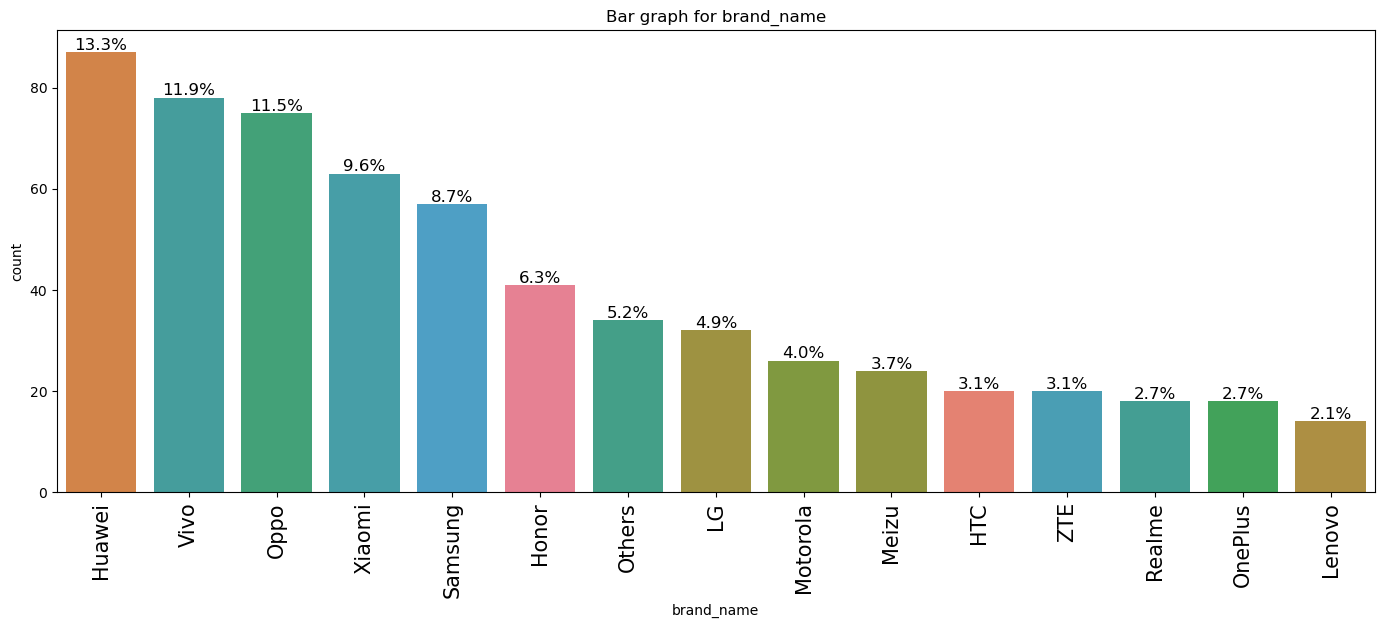

In [2581]:
#call the bar plot function to display count of brand which offer selfie camera greater than 8mp
univariate_analysis_for_catgCols(df_selfieCam,'brand_name',perc=True,n=15)  # (n=15) will display the data for top 15 brands.


**Observation:**

- *There are `655 devices with 25 different brands` which offered devices with `selfie camera greater than 8 MP`.*
- *`Huawei (87 devices) is the leading brand` in providing devices with `selfie camera greater than 8 MP` followed by `Vivo(78)` and `Oppo(75)`.*

#### Q7. Which attributes are highly correlated with the normalized price of a used device?

**Please note the calulation and detailed analysis is provided under bivariate analysis above (Heat map to find correlation between numerical columns)**

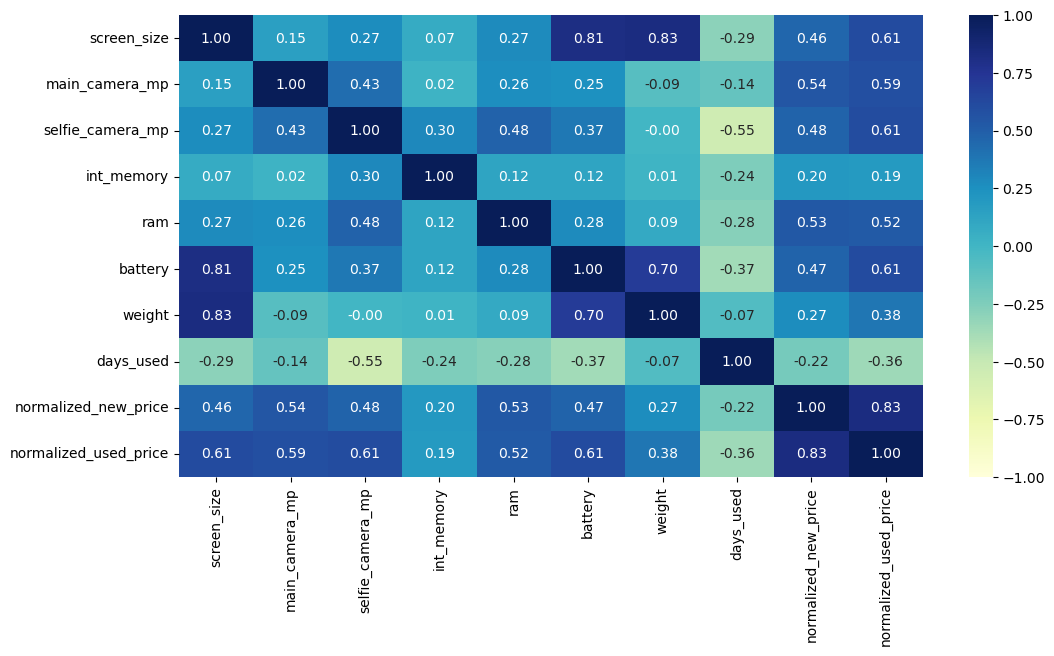

In [2585]:
#plot the map
plt.figure(figsize=(12,6))
sns.heatmap(data=df_corr, cmap='YlGnBu',annot=True,vmin=-1, vmax=1,fmt=".2f")
plt.show();

**Observation:**

*`normalised_used_price` shows `strong positive correlations` with `normalized_new_price(.83)` i.e if the price of same model is high then used/refurbished device price will also be high.*

#### Additional Questions

**Lets check distribution of devices offering main cameras greater than 13 MP across brands.**

In [2589]:
#Create a dataframe for devices having main cameras greater than 13 MP
main_Gr_13=data['main_camera_mp']> 13
df_mainCam=data[main_Gr_13]
df_mainCam.shape

(267, 15)

In [2590]:
#total brand offering devices with main camera greater than 13 megapixels
df_mainCam['brand_name'].nunique()

26

In [2591]:
#top 5 brand with devices count offering devices main camera greater than 13 megapixels
df_mainCam['brand_name'].value_counts().head()

brand_name
Samsung     44
Sony        39
Others      37
ZTE         29
Motorola    15
Name: count, dtype: int64

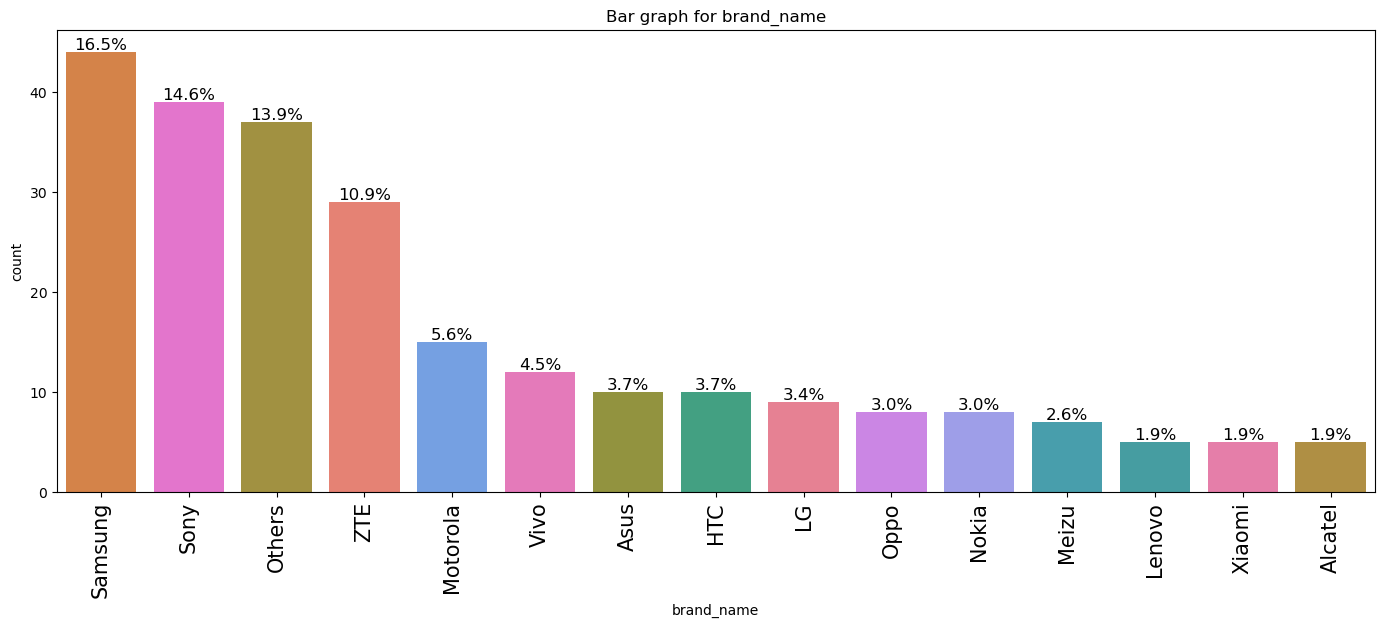

In [2592]:
#call the bar plot function to display count of brand which offer main camera greater than 13mp
univariate_analysis_for_catgCols(df_mainCam,'brand_name',perc=True,n=15)  # (n=15) will display the data for top 15 brands.


**Observation:**

- *There are `267 devices with 26 different brands` which offered devices with `main camera greater than 13 MP`.*
- *`Samsung (44 devices) is the leading brand` in providing devices with `main camera greater than 13 MP` followed by `Sony(39)` and `Others(37)`.*


**Let's check how the price of used devices varies across the years.**

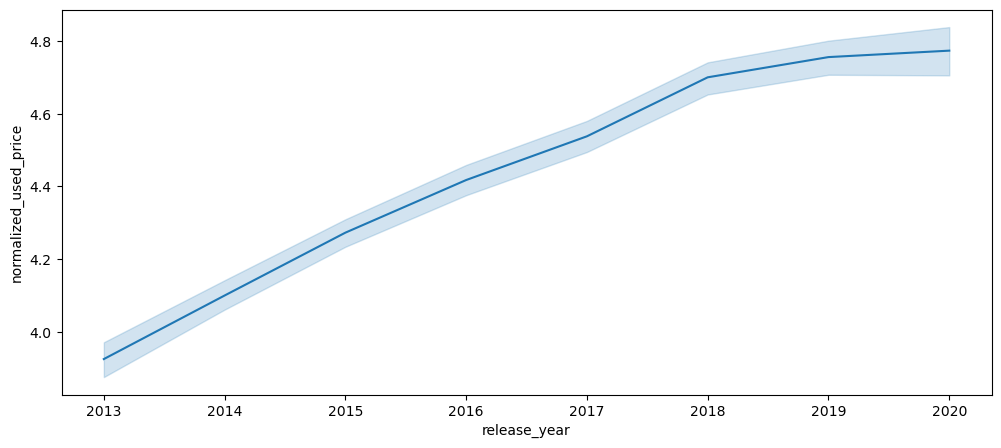

In [2595]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=data, x='release_year', y='normalized_used_price') 
plt.show()

**Observation:**

- *The normalized price continue to `increase linearly` from `year 2013 till 2018`.*
- *From `year 2018 to 2019` we see this `increase is little less`. which further slowed down in year 2019 to 2020, indicating moderate demands and stability in used market device.*
  

**Brand vs Normalized used price**

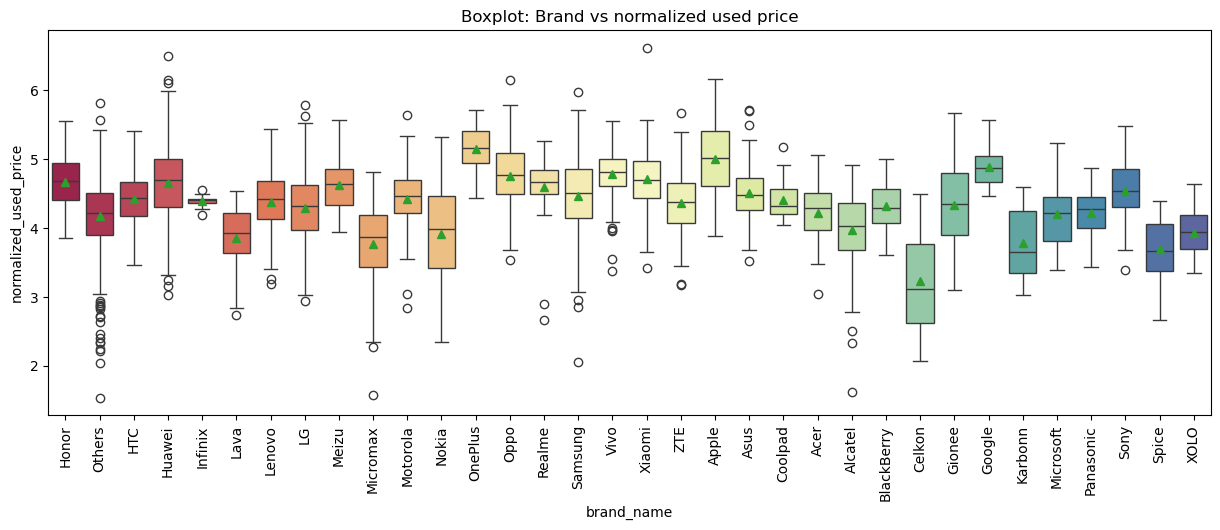

In [2598]:
#Let's check how the prices vary for used phones and tablets across different brands
plt.figure(figsize=(15, 5))
plt.title('Boxplot: Brand vs normalized used price')
sns.boxplot(data=data, x='brand_name', y='normalized_used_price',palette = 'Spectral', hue='brand_name',showmeans=True)
plt.xticks(rotation=90)
plt.show()

**Observation:**

- *The `mean and median` value are almost same and at the center for almost all brand.*
- *`Celkon` brand offer device with lower value. `75% of device `is priced `below 4 euros`.*
- *Few devices for brand `Huawei,Oppo,Xiaomi `have priced listed `more than 6 euros.`*
  

**Lets check the normalized used price in top 10 brand**

In [2601]:
#Find the top 10 brands by value_counts and store it in a variable.
top10brand=data['brand_name'].value_counts().head(n=10).keys()
top10brand

#apply filter to display rows belonging to the top 10 brands
df_topbrand=data[data['brand_name'].isin(top10brand)]

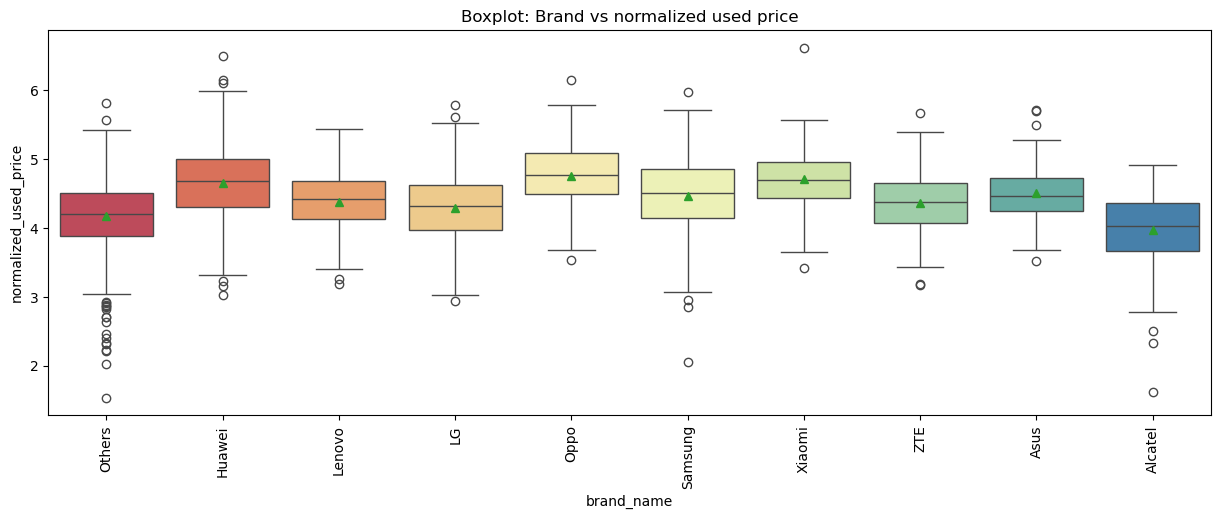

In [2602]:
#Let's check how the prices vary for used phones and tablets in top 10 brand.
plt.figure(figsize=(15, 5))
plt.title('Boxplot: Brand vs normalized used price')
sns.boxplot(data=df_topbrand, x='brand_name', y='normalized_used_price',palette = 'Spectral', hue='brand_name',showmeans=True)
plt.xticks(rotation=90)
plt.show()

**Observation:**

- *The `mean and median` value are almost same and centered around at the center.*
- *The `median and mean` value for most of the brand lies in the `range 4 to 4.8 euros`, suggesting normalized used price `is consistent across the brand`, except for outliers in few brand*.
- *Few outliers are present at both the ends. `lots of outliers are present` in  brand `Others`.*
- 

**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

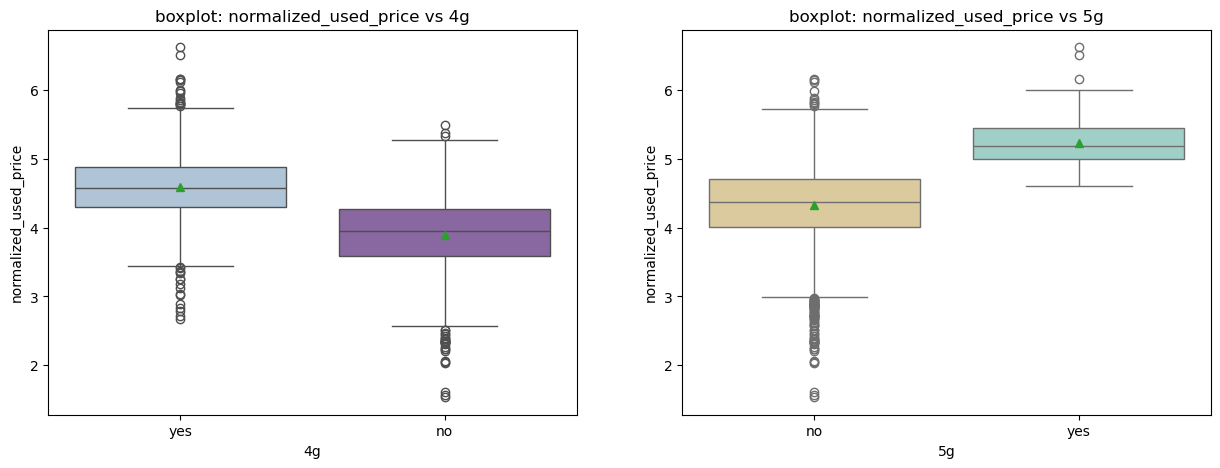

In [2605]:
#boxplot to analyze how device normalized price vary for used phones and tablets.
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('boxplot: normalized_used_price vs 4g')                                                 #boxplot for 4g
sns.boxplot(data=data, x="4g", y="normalized_used_price", hue='4g' ,palette='BuPu',showmeans=True)

plt.subplot(122)
plt.title('boxplot: normalized_used_price vs 5g')
sns.boxplot(data=data, x="5g", y="normalized_used_price", hue='5g', palette='BrBG',showmeans=True) #boxplot for 5g

plt.show()

**Observation:** <br>
  `normalized used price vs 4g`
- *The `mean and median for normalized price` is almost `same` for both devices having `4g or not`, making distribution normal and symetric.*
- *The `average normalized used price of devices with 4g` is `higher(approx 4.5 euros)` when compared to devices with `no 4g(approx 4 euros).`*  
- *There are lots of `outliers present` on both the end of devices having 4g.*
  
`normalized used price vs 5g`
- *The `mean and median` for normalized price is almost `same` for both devices having 5g or not, making distribution normal and symetric.*
- *The `average normalized used price of devices with 5g` is `higher(approx 5.3 euros)` when compared to devices with `no 4g(approx 4.5 euros)`.*
  
- *The `normalized used price of devices with 5g`is `higher` when compared to `4g devices`,suggesting the normalized used price increases if the device has 5g network.*


## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Missing value treatment**

As observed there were few columns which have missing data(NaN), which need to be treated before we build the model otherwise it leads to inaccurate results, misinterpretations, and biased models.
There are several ways to treat these missing values-
  * `Deleting the rows/columns for missing data` - this can be used when missing data is less in number or doesn't make much difference without them.
  * `Imputing it with mean,median or mode-` <br>
    - `Replacing with mean` is a good idea when there are no outliers and average mean is not biased.
    - `Replacing with median` is a applied when there are outliers and average mean is biased.
    - `Replacing with mode` is generally preferred with categorical data.

Since we have `lots of outliers present` in our dataset, we will `impute the missing values with median`.
    

**Lets create a new dataframe and functions to check the columns with missing/null values details**


In [2612]:
#create a copy of actual dataset to avoid making changes to original dataset
df_new=data.copy()

In [2613]:
#list of columns names for which values are missing
cols_to_check=['main_camera_mp','selfie_camera_mp','int_memory','ram','battery','weight']


**function to check columns with null/missing values and display those values**

In [2615]:
#fn to check missing values present in columns and grouping by release year and brand_name
def missing_col_value(df_ms,cols_name):
    
    for cols in cols_name:
        cond=df_ms[cols].isnull()==True
        print('Display missing value for column:',cols,'\n')
        print(df_ms[cond].groupby(['release_year','brand_name'])[cols].count())
         

In [2616]:
#call the function to check the value missing under each release year for particular brand
missing_col_value(df_new,cols_to_check)

Display missing value for column: main_camera_mp 

release_year  brand_name
2017          OnePlus       0
2018          BlackBerry    0
              Coolpad       0
              OnePlus       0
              Panasonic     0
2019          Asus          0
              Coolpad       0
              Infinix       0
              Meizu         0
              OnePlus       0
              Realme        0
              Sony          0
2020          Coolpad       0
              Infinix       0
              Lava          0
              Meizu         0
              Motorola      0
              OnePlus       0
              Oppo          0
              Realme        0
              Sony          0
              Vivo          0
              Xiaomi        0
              ZTE           0
Name: main_camera_mp, dtype: int64
Display missing value for column: selfie_camera_mp 

release_year  brand_name
2018          Google        0
Name: selfie_camera_mp, dtype: int64
Display missing value fo

- *Now we got the `list of missing data` under `each release year and brand name`, lets impute these with median value of that column `using filna and transform` pandas functions.*

- *We will use `fillna() function` and `transform method of pandas` to impute the missing values.*

**`fillna() Function -`** The fillna() function is used to fill NaN values using the provide input value.<br>
    
    Syntax of fillna():  data['column'].fillna(value = x)
 
**`transform function -`** The transform() function works on each value of a DataFrame and allows to execute a specified function on each value.<br>
     
     Syntax of transform function: data.transform(func = function name)
     func - A function to be executed on the values of the DataFrame.


**impute the missing values in missing column with median value**

In [2620]:
#for loop to iterate for each selected columns

for col in cols_to_check:
    df_new[col] = df_new[col].fillna(
        value=df_new.groupby(['release_year','brand_name'])[col].transform("median")  
    ) 
#lets check if missing values are treated using info() fn
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

- *We can see the missing data for `ram and internal_memory` is imputed with `median value`.But the `missing value is still present` in remaining columns 
    `main_camera_mp,selfie_camera_mp,battery,weight.`*
- *Lets treat them using brand_name only*

**impute the missing values in remaining column with median value by grouping data by brand_name**

In [2623]:
#for loop to iterate for each selected columns

cols_to_check = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]
for col in cols_to_check:
    df_new[col] = df_new[col].fillna(
        value=df_new.groupby(['brand_name'])[col].transform('median')  
    )   

#lets check if missing values are treated using info() fn
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3444 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

- *We can see the no missing data in all column `except main_camera_mp` is still having null value.Lets treat it using column median value*

In [2625]:
df_new['main_camera_mp'] = df_new['main_camera_mp'].fillna(df_new['main_camera_mp'].median()) ## Complete the code to impute the data with median

#lets check if missing values are treated using info() fn
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

- *We now do not see any null values in any of the columns.*

### Feature Engineering

- As we know we cannot have any column with date format for building the model, we have to convert the date into int datatype.
- Lets begin with converting release_year date column to integer. we know from the dataset, release year ranges from 2013-2020, so considering 2021 as baseline year we can calculate this column data.


`Step1:` Create a new column `years_since_release` from the `release_year` column by subracting the value with base year(2021).<br>
  `2021-2013=8 means` 8 yrs since it release date.<br>
` Step2:` After creating this new year column we will drop the `release_year` column.


In [2630]:
#Create a new column `years_since_release` from the `release_year` column by subracting the value with base year(2021)
df_new["years_since_release"] = 2021 - df_new["release_year"] 

#drop the old column
df_new.drop("release_year", axis=1, inplace=True)                  #With inplace=True (modifies the original DataFrame)


In [2631]:
#check the new column datatype
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  days_used              3454 non-null   int64  
 12  normalized_used_price  3454 non-null   float64
 13  normalized_new_price   3454 non-null   float64
 14  years_since_release    3454 non-null   int64  
dtypes: f

- *We can see the column release_year is dropped from dataframe and new column years_since_release is added with datatype int.*

### Outlier Check

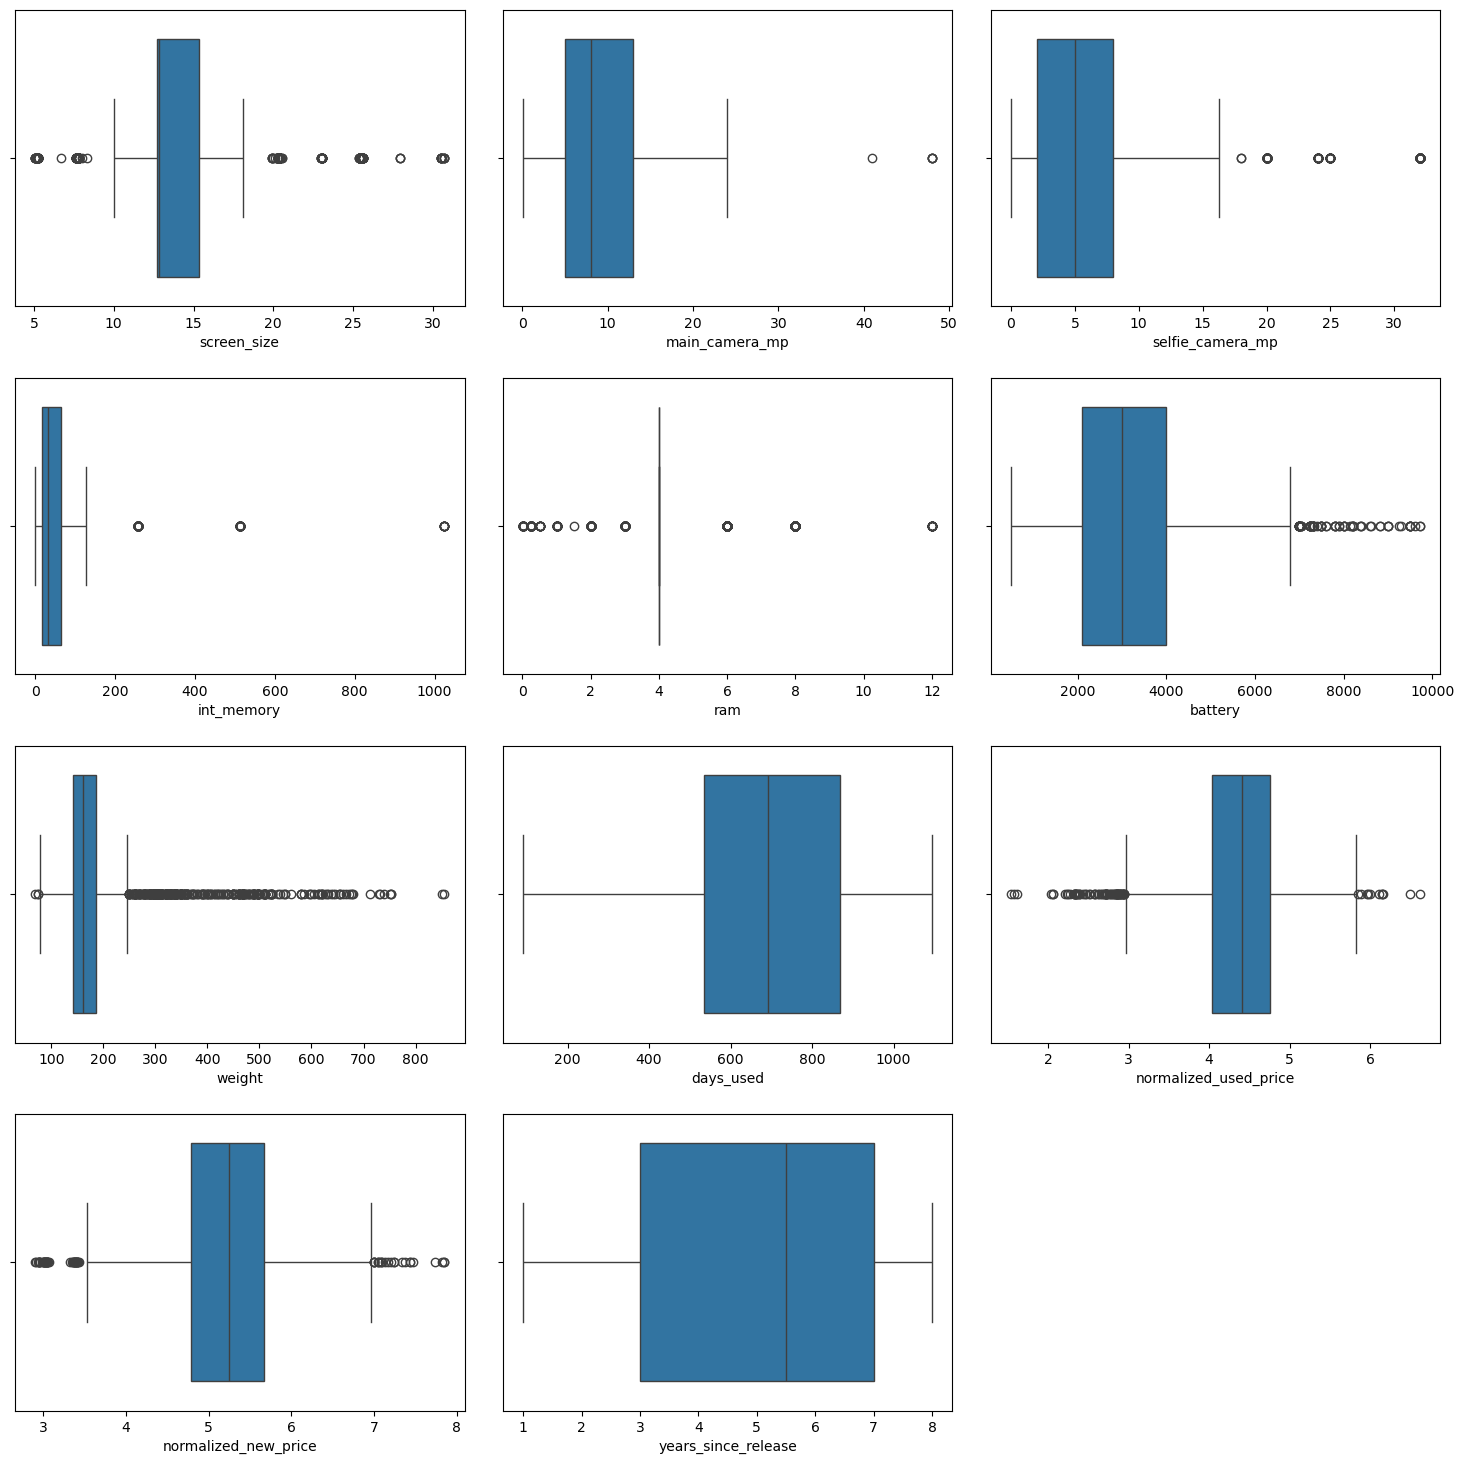

In [2634]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list
num_cols = df_new.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df_new, x=variable)
    plt.tight_layout(pad=2)

plt.show()

**Observation on treating the outliers:**

- *`Except days_used and years_since_release`, outliers are present in all the columns.*
  
- *`Outliers presence are higher` in columns like `battery,weight,normalized_new and normalized_used_price`.Since these columns value can be very high or low for due to variation in size,type and nature of the devices. The dataset contains both phone and tablets data and weight, price,battery can vary significantly from device to device. Since we do not have information on device types , removing these values can bisaed the results. Hence we can keep the data for data modeling.*
  
- *Similarly `presence of outliers in screen_size` can be due to nature of device type(like tablet/larger smartphone/ or smaller basic old generation budget phone).*

- *This will hold again true for rear and front camera,ram and internal memory, the high n low variation in values can be because of advance technique in higher end phones and tablet or the large/small size.*
  

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [2638]:
#check for missing data and datatype information
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  days_used              3454 non-null   int64  
 12  normalized_used_price  3454 non-null   float64
 13  normalized_new_price   3454 non-null   float64
 14  years_since_release    3454 non-null   int64  
dtypes: f

- *No missing/null values present in any of the columns.All null values are imputed by median values.*
- *Year_since_release is added and release_year column is dropped.*

In [2640]:
#statistical summary
df_new.describe(include='all').T

count unique      top  freq         mean          std  \
brand_name               3454     34   Others   502          NaN          NaN   
os                       3454      4  Android  3214          NaN          NaN   
screen_size            3454.0    NaN      NaN   NaN    13.713115      3.80528   
4g                       3454      2      yes  2335          NaN          NaN   
5g                       3454      2       no  3302          NaN          NaN   
main_camera_mp         3454.0    NaN      NaN   NaN     9.617597     4.749438   
selfie_camera_mp       3454.0    NaN      NaN   NaN     6.555067      6.96844   
int_memory             3454.0    NaN      NaN   NaN    54.528474    84.934991   
ram                    3454.0    NaN      NaN   NaN      4.03262     1.368598   
battery                3454.0    NaN      NaN   NaN  3132.577446  1298.884193   
weight                 3454.0    NaN      NaN   NaN   182.636856    88.360445   
days_used              3454.0    NaN      NaN   NaN   674.869716   248.580166   
normalized_used_price  3454.0    NaN      NaN   NaN     4.364712     0.588914   
normalized_new_price   3454.0    NaN      NaN   NaN     5.233107     0.683637   
years_since_release    3454.0    NaN      NaN   NaN     5.034742     2.298455   

                            min       25%       50%       75%       max  
brand_name                  NaN       NaN       NaN       NaN       NaN  
os                          NaN       NaN       NaN       NaN       NaN  
screen_size                5.08      12.7     12.83     15.34     30.71  
4g                          NaN       NaN       NaN       NaN       NaN  
5g                          NaN       NaN       NaN       NaN       NaN  
main_camera_mp             0.08       5.0       8.0      13.0      48.0  
selfie_camera_mp            0.0       2.0       5.0       8.0      32.0  
int_memory                 0.01      16.0      32.0      64.0    1024.0  
ram                        0.02       4.0       4.0       4.0      12.0  
battery                   500.0    2100.0    3000.0    4000.0    9720.0  
weight                     69.0     142.0     160.0     185.0     855.0  
days_used                  91.0     533.5     690.5    868.75    1094.0  
normalized_used_price  1.536867  4.033931  4.405133    4.7557  6.619433  
normalized_new_price   2.901422  4.790342  5.245892  5.673718  7.847841  
years_since_release         1.0       3.0       5.5       7.0       8.0

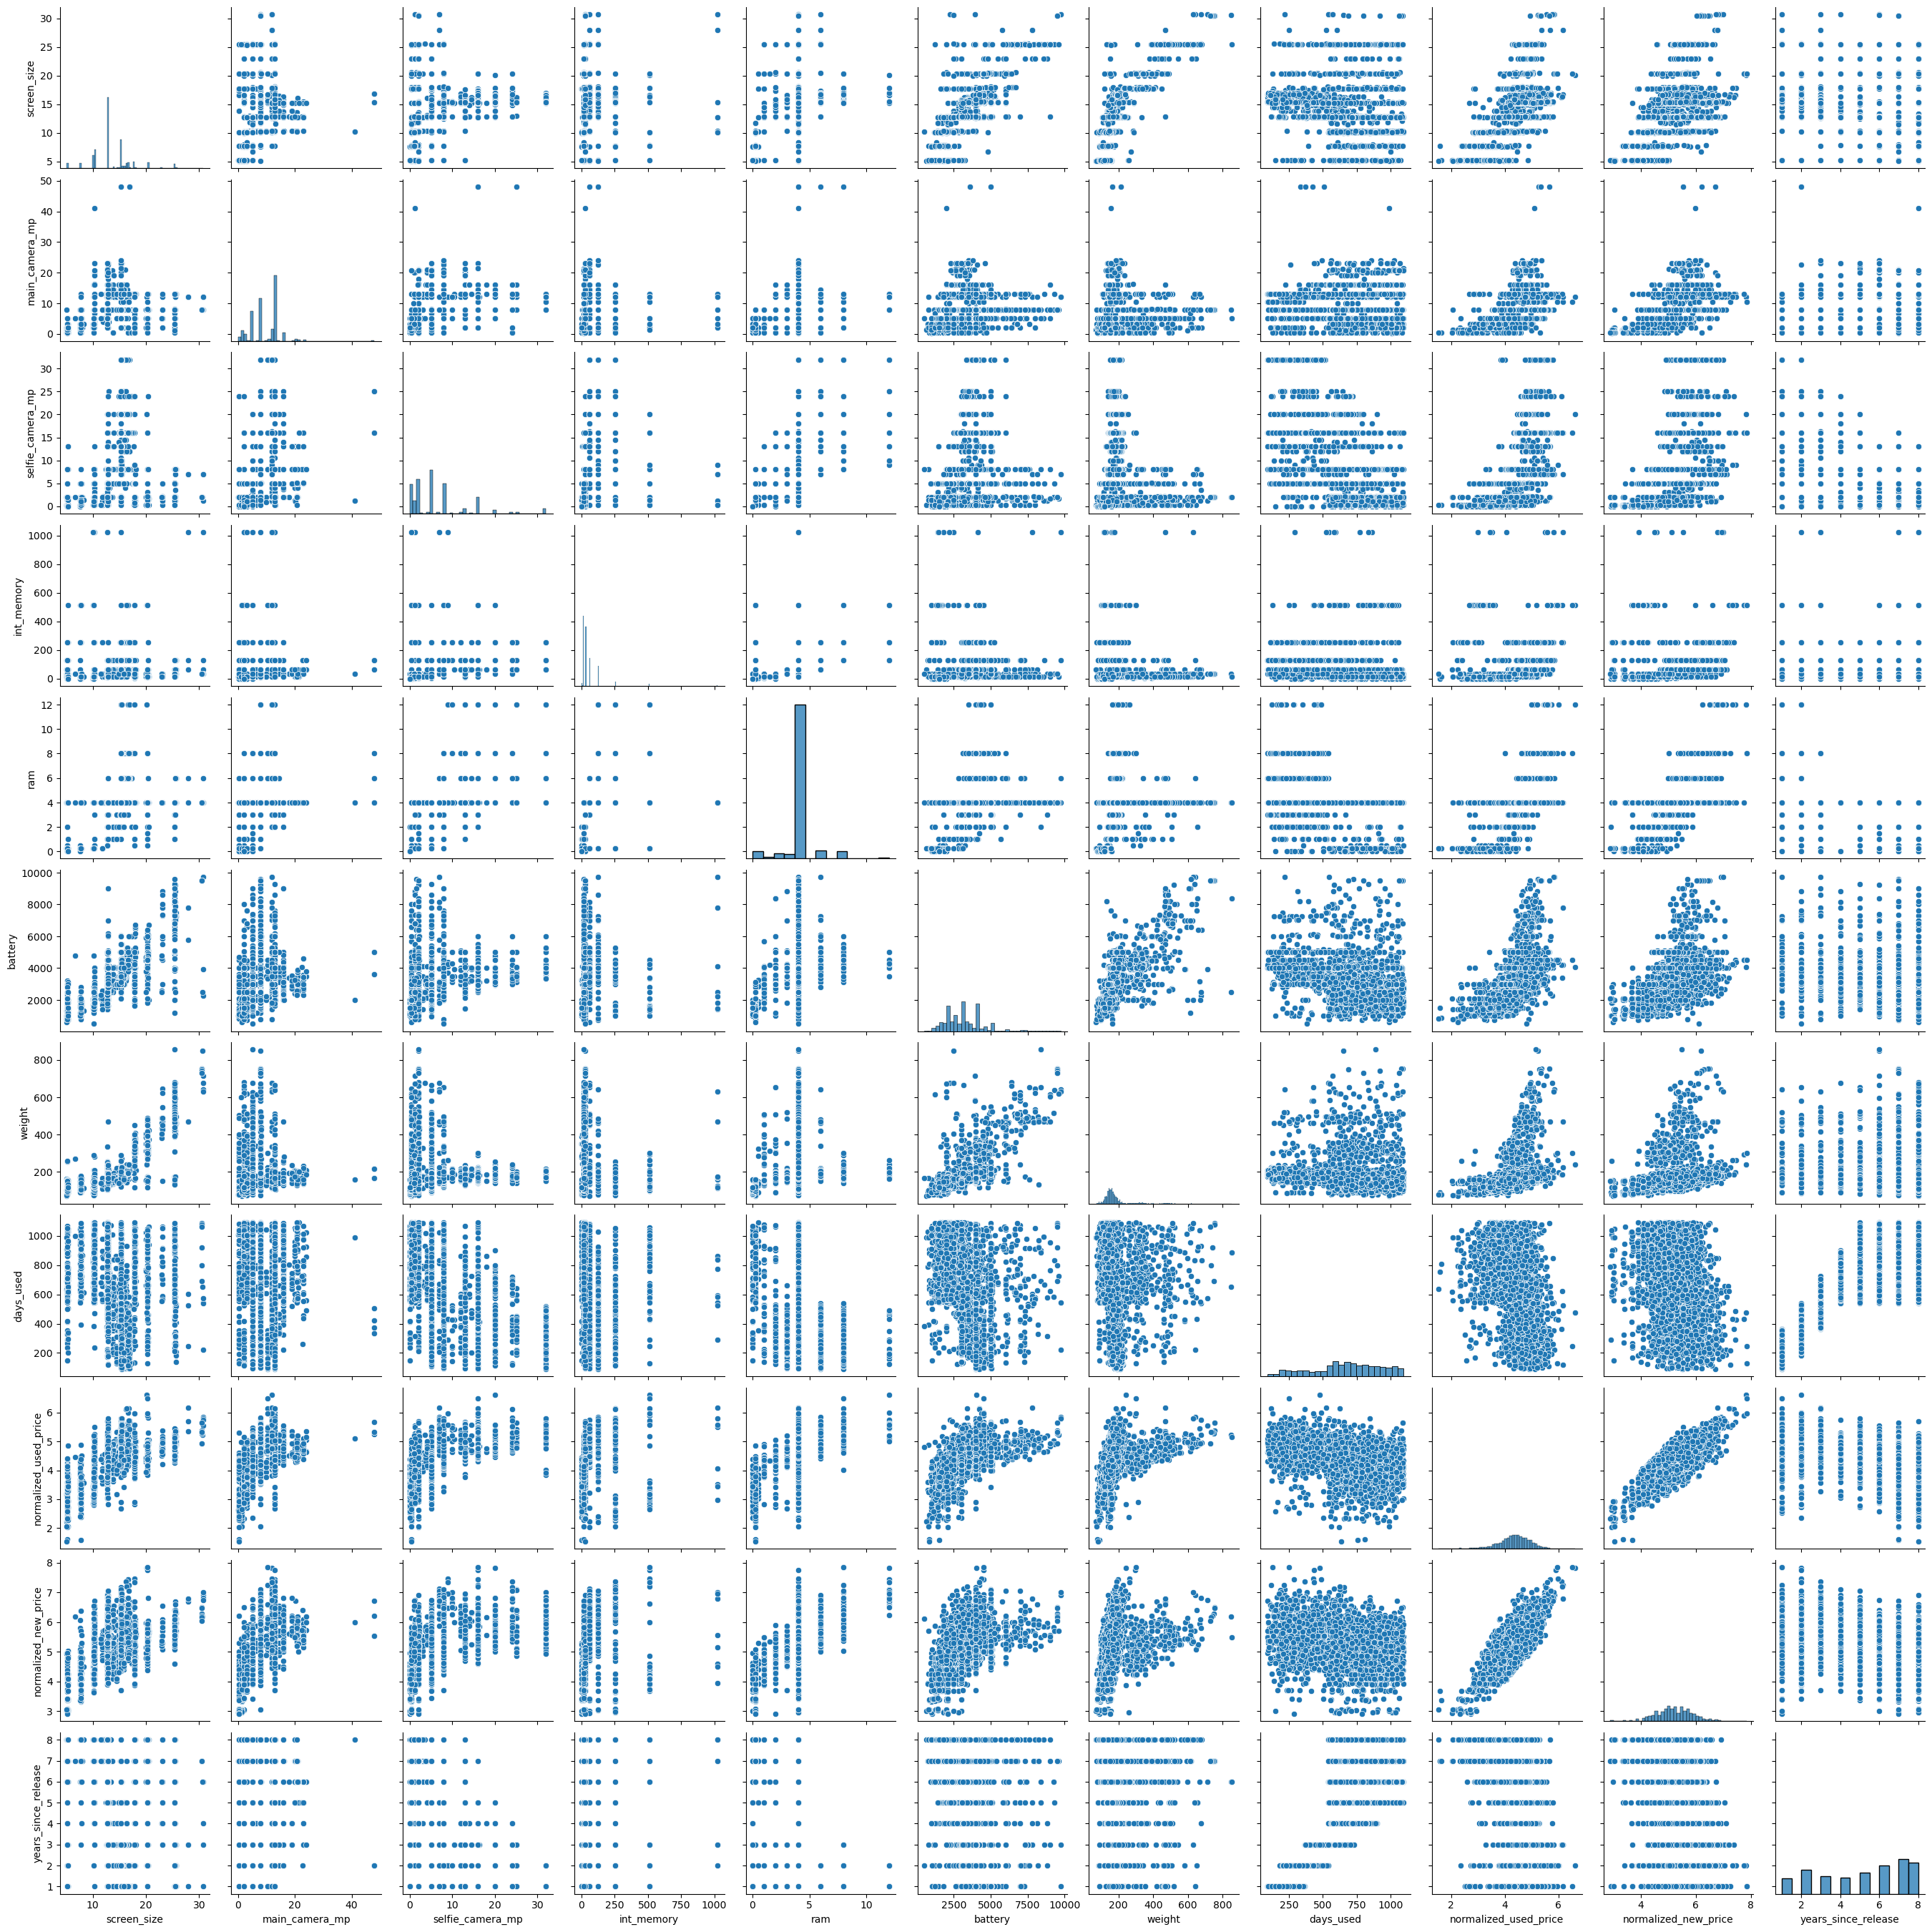

In [2641]:
# Lets plot pairplot to understand the relationships between the all the numeric variables
sns.pairplot(data = df_new);

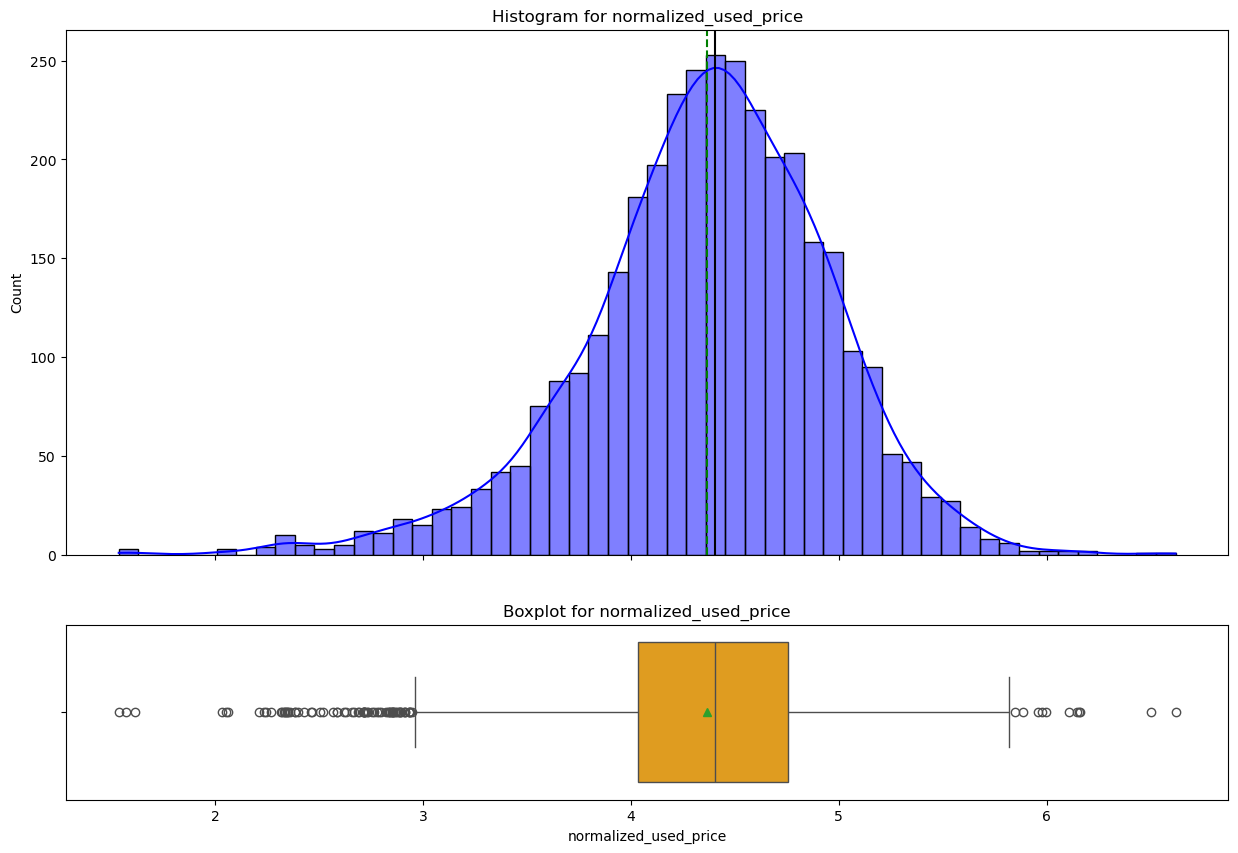

In [2642]:
#call the function to plot histogram and box for column normalized_used_price
univariate_analysis_for_numCols(df_new,'normalized_used_price')

- *The EDA data looks fine. Lets prepare data for modeling*

### Data Preparation for modeling

- *The main objective of building a linear regression model is to `predict the price of a used phone/tablet` and identify factors that significantly influence it.*
- *There are few checks we need to perform before proceeding with model building.*
  
- *dropping the irrelevant columns and creating dummy variables for categorical columns.*
- *Identify the dependent and independent variables.*
- *splitting the dataset into train and test.*
    
  

#### Identify the dependent and independent variables

In [2647]:
#independent variable
X = df_new.drop(['normalized_used_price'],axis=1)

X.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.630961                    1  
4              4.947837                    1

In [2648]:
#dependent variable
y = df_new['normalized_used_price']
y.head()

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: normalized_used_price, dtype: float64

In [2649]:
# let's add the intercept to data
X = sm.add_constant(X)

#### Create dummy variables

In [2651]:
#create dummies variable for all categorical column

X = pd.get_dummies(
    X,                                                                        #dataframe for dependent variable
    columns=X.select_dtypes(include=['object', 'category']).columns.tolist(), #Select categorical columns using include(datatype=object) and convert to the list
    drop_first=True,                     # drop_first=True will drop the first categorical columns
) 
X.head()

const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
0    1.0        14.50            13.0               5.0        64.0  3.0   
1    1.0        17.30            13.0              16.0       128.0  8.0   
2    1.0        16.69            13.0               8.0       128.0  8.0   
3    1.0        25.50            13.0               8.0        64.0  6.0   
4    1.0        15.32            13.0               8.0        64.0  3.0   

   battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
0   3020.0   146.0        127              4.715100  ...             False   
1   4300.0   213.0        325              5.519018  ...             False   
2   4200.0   213.0        162              5.884631  ...             False   
3   7250.0   480.0        345              5.630961  ...             False   
4   5000.0   185.0        293              4.947837  ...             False   

   brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  brand_name_ZTE  \
0            False            False              False           False   
1            False            False              False           False   
2            False            False              False           False   
3            False            False              False           False   
4            False            False              False           False   

   os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
0      False       False   False    True   False  
1      False       False   False    True    True  
2      False       False   False    True    True  
3      False       False   False    True    True  
4      False       False   False    True   False  

[5 rows x 49 columns]

**Observation:**

- *`Dummy variable` is created for all the `4 columns Brand,os, 4g and 5g`*.
- *I've not dropped the brand_name even though they are more in number and we saw consistent pricing in used device except for few brands(due to outliers), because brand plays an important role in deciding the price.The well known brands like samsung and Iphone gauge the price.But there are few other factor too be consider like region. Country like USA, Iphone are more common and affordable, while in India markets for android is hot and less for Iphone.*

In [2653]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  3454 non-null   float64
 1   screen_size            3454 non-null   float64
 2   main_camera_mp         3454 non-null   float64
 3   selfie_camera_mp       3454 non-null   float64
 4   int_memory             3454 non-null   float64
 5   ram                    3454 non-null   float64
 6   battery                3454 non-null   float64
 7   weight                 3454 non-null   float64
 8   days_used              3454 non-null   int64  
 9   normalized_new_price   3454 non-null   float64
 10  years_since_release    3454 non-null   int64  
 11  brand_name_Alcatel     3454 non-null   bool   
 12  brand_name_Apple       3454 non-null   bool   
 13  brand_name_Asus        3454 non-null   bool   
 14  brand_name_BlackBerry  3454 non-null   bool   
 15  bran

- *We can observe the datatype for all the dummies variable has changed to bool. We usually get datatype error while running the model as the machine works on numerical data.*
- *converting all the bool datatype to either int/float.*

In [2655]:
# Extract dummy variable columns with boolean datatype
dummy_cols=X.select_dtypes(include=['bool']).columns

# Cast the boolean columns to float
X[dummy_cols]=X[dummy_cols].astype(float)

#check for datatypes
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  3454 non-null   float64
 1   screen_size            3454 non-null   float64
 2   main_camera_mp         3454 non-null   float64
 3   selfie_camera_mp       3454 non-null   float64
 4   int_memory             3454 non-null   float64
 5   ram                    3454 non-null   float64
 6   battery                3454 non-null   float64
 7   weight                 3454 non-null   float64
 8   days_used              3454 non-null   int64  
 9   normalized_new_price   3454 non-null   float64
 10  years_since_release    3454 non-null   int64  
 11  brand_name_Alcatel     3454 non-null   float64
 12  brand_name_Apple       3454 non-null   float64
 13  brand_name_Asus        3454 non-null   float64
 14  brand_name_BlackBerry  3454 non-null   float64
 15  bran

- *Now since all columns are either in float or integer, we can proceed with spliting of dataset into test and train*

#### Split the dataset 

In [2658]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=1) 


In [2659]:
print('Number of rows =', x_train.shape[0] ,'and columns =',x_test.shape[1],'in train data')
print('Number of rows =', x_test.shape[0],'and columns =',x_test.shape[1],'in test data')


Number of rows = 2417 and columns = 49 in train data
Number of rows = 1037 and columns = 49 in test data


## Model Building - Linear Regression

**fit OLS model**

In [2662]:
# fit OLS model for training data
olsmodel1 = sm.OLS(y_train, x_train).fit() 

# let's print the regression summary
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                           22:25:05   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observation**

1. **`R-squared:`** It reflects the fit of the model.
    - It generally `range from 0 to 1`, where a `higher value` generally indicates a `better fit` i.e explains the variability and vice-versa.
    - `0.845` $R^2$ value on train data here means `84.5% of the variance` in the dependent variable `(target) `can be` explained by `the independent variables `(predictors)`.
      
2. **`Adjusted. R-squared`:** It also reflects the fit of the model and adjust for the number of predictors (independent variables). i.e add or remove the features/predictors based on how best it fit the model. It is always lower than $R^2$.
    - It generally `range from 0 to 1`, where a `higher value` generally indicates a `better fit` i.e explains the variability and vice-versa.
    - In our case, the value for adj. R-squared is `0.842`, which is high and good, meaning `84% variance in target variable` can be explained by `independent(predictors)` variables
      
3. **`const* coefficient:`** It is the Y-intercept.
    - It means that if all the `predictor variable coefficients are zero`, then the `expected output (i.e., Y`) would be `equal to the const coefficient`.
    - In our case, the value for `const` coefficient is **1.3156**


4. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else remains constant).
    - In our case, the coefficient of `screen_size` is **0.0244**.

## Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a single function which will print out all the above metrics in one go.

In [2667]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [2668]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.229884  0.180326   0.844886        0.841675  4.326841

In [2669]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test) # check the performance on test data
olsmodel1_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.238358  0.184749   0.842479        0.834659  4.501651

**Observations**

- *The `training` $R^2$ is **0.844** which is `high`, suggesting the model fits the data well` and is `not underfitting.`*
  
- *The `test` **$R^2$** of **0.842** means, `84.2% of dependent(target)` variable is explained by `independent(predictors) variable.`*
  
- *The adjusted **$R^2$** for `training(0.841) and test data(0.834)` are `comparable` so the `model is not overfitting`.*
  
- *Also the training and test `RMSE and MAE are comparable`, so the `model is not overfitting`.*

- *`MAE(Mean Absolute Error)` is `average of the absolute differences between the actual values and the predicted values`.Here the value suggests that the model `can predict normalized used price for Recell data` within a `mean error of 0.184 on the test data` and 0.18 on train data. `Smaller the MAE` better the model performance.*

- *`MAPE` is the average percentage difference between the actual and predicted values. Lower the value better the predictions. The `value 4.5 on the test data` means that we are able to `predict within 4.5% of the normalized used price`.*

## Checking Linear Regression Assumptions

In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.<br>
We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

Multicollinearity occurs when predictor variables in a regression model are correlated.Since independent varaibles need to be independent, If the correlation between variables exists and is high, it can cause problems when we fit the model and biased the results. 

**Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. i.e. a statistical measure used to detect multicollinearity among independent variables in a regression model. 

- Test for multicollinearity using VIF

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [2675]:
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()   #create an empty dataframe to store features(column name) and it's corresponding vif values
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [2676]:
checking_vif(x_train)  ## call fn to check VIF on train data

feature         VIF
0                   const  227.744081
1             screen_size    7.677290
2          main_camera_mp    2.285051
3        selfie_camera_mp    2.812473
4              int_memory    1.364152
5                     ram    2.282352
6                 battery    4.081780
7                  weight    6.396749
8               days_used    2.660269
9    normalized_new_price    3.119430
10    years_since_release    4.899007
11     brand_name_Alcatel    3.405693
12       brand_name_Apple   13.057668
13        brand_name_Asus    3.332038
14  brand_name_BlackBerry    1.632378
15      brand_name_Celkon    1.774721
16     brand_name_Coolpad    1.468006
17      brand_name_Gionee    1.951272
18      brand_name_Google    1.321778
19         brand_name_HTC    3.410361
20       brand_name_Honor    3.340687
21      brand_name_Huawei    5.983852
22     brand_name_Infinix    1.283955
23     brand_name_Karbonn    1.573702
24          brand_name_LG    4.849832
25        brand_name_Lava    1.711360
26      brand_name_Lenovo    4.558941
27       brand_name_Meizu    2.179607
28    brand_name_Micromax    3.363521
29   brand_name_Microsoft    1.869751
30    brand_name_Motorola    3.274558
31       brand_name_Nokia    3.479849
32     brand_name_OnePlus    1.437034
33        brand_name_Oppo    3.971194
34      brand_name_Others    9.711034
35   brand_name_Panasonic    2.105703
36      brand_name_Realme    1.946812
37     brand_name_Samsung    7.539866
38        brand_name_Sony    2.943161
39       brand_name_Spice    1.688863
40        brand_name_Vivo    3.651437
41        brand_name_XOLO    2.138070
42      brand_name_Xiaomi    3.719689
43         brand_name_ZTE    3.797581
44              os_Others    1.859863
45             os_Windows    1.596034
46                 os_iOS   11.784684
47                 4g_yes    2.467681
48                 5g_yes    1.813900

* There are few columns like `screen_size, weight` with very `moderate VIF values(value greater than 5 but less than 10),` indicating presence of `moderate multicollinearity.`*
* Few columns like brand_name_Apple,os_iOS have IVF value greater than 10 and shows strong multicollinearity. But we will not remove it as they are dummy variables 
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

#### lets create a single functions to drop columns with high multicollinearity VIF>5

- *We observe that both the `screen_size(7.67) and  weight(6.396)` have `moderate VIF`. lets check and systematically drop these columns*.
  

In [2680]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [2681]:
col_list = ['screen_size', 'weight']

# call functions to check the effect on model performance after dropping specified columns from train data
res = treating_multicollinearity(x_train, y_train, col_list)
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0  screen_size                           0.838381                 0.234703
1       weight                           0.838071                 0.234928

**Observation**
- *We see almost similar drop in Adjusted R-squared when dropping weight or  screen_size. `Lets drop weights and keep screen_size`.


In [2683]:
#lets drop the column 'weight' 
col_to_drop = 'weight'

#specify the train data from which to drop the column specified
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] 

# specify the test data from which to drop the column specified
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]    


# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


feature         VIF
0                   const  208.983030
1             screen_size    3.593184
2          main_camera_mp    2.188817
3        selfie_camera_mp    2.787946
4              int_memory    1.364018
5                     ram    2.280390
6                 battery    3.681135
7               days_used    2.648280
8    normalized_new_price    3.116297
9     years_since_release    4.726722
10     brand_name_Alcatel    3.405634
11       brand_name_Apple   13.052085
12        brand_name_Asus    3.329527
13  brand_name_BlackBerry    1.632331
14      brand_name_Celkon    1.774249
15     brand_name_Coolpad    1.467932
16      brand_name_Gionee    1.951224
17      brand_name_Google    1.321656
18         brand_name_HTC    3.408430
19       brand_name_Honor    3.339066
20      brand_name_Huawei    5.983684
21     brand_name_Infinix    1.282407
22     brand_name_Karbonn    1.573621
23          brand_name_LG    4.849000
24        brand_name_Lava    1.711137
25      brand_name_Lenovo    4.557575
26       brand_name_Meizu    2.179175
27    brand_name_Micromax    3.363424
28   brand_name_Microsoft    1.867689
29    brand_name_Motorola    3.269552
30       brand_name_Nokia    3.474548
31     brand_name_OnePlus    1.436740
32        brand_name_Oppo    3.971169
33      brand_name_Others    9.680324
34   brand_name_Panasonic    2.105687
35      brand_name_Realme    1.946779
36     brand_name_Samsung    7.537336
37        brand_name_Sony    2.939161
38       brand_name_Spice    1.686997
39        brand_name_Vivo    3.650722
40        brand_name_XOLO    2.136746
41      brand_name_Xiaomi    3.719683
42         brand_name_ZTE    3.795623
43              os_Others    1.744860
44             os_Windows    1.596034
45                 os_iOS   11.750869
46                 4g_yes    2.447780
47                 5g_yes    1.811783

**Observation:**

- *After dropping column `weight` , the IVF values reduced for `screen_size (3.574245)` and also the VIF values are under 5 for all independent variables except for few dummy varaibles which we are not dropping.*

- *We have dealt with multicollinearity in the data.*
- *Let's rebuild the model using the updated set of predictors variables.*

In [2686]:
#model# 2 after dropping column 'weight'
olsmod2 = sm.OLS(y_train, x_train2).fit()

# let's print the regression summary
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.0
Date:                   Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                           22:25:07   Log-Likelihood:                 95.629
No. Observations:                   2417   AIC:                            -95.26
Df Residuals:                       2369   BIC:                             182.7
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Dropping high p-value variables (if needed)

- *We will `drop the predictor variables having a p-value greater than 0.05` as they do not significantly impact the target variable.*
- *we can see `high p-values` in independent variables `int_memory(.119),battery(.982)' and 'days_used(0.064 )`*
- *There are also `high p-values present` in some of the `dummies variables.`*    


**Lets create a functions to treat this high p-values using loops to make the code more efficient i.e p-values >.05**

- *Build a model, check the p-values of the variables, and drop the column with the highest p-value.*
- *Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.*
- *Repeat the above two steps till there are no columns with p-value > 0.05.*


In [2689]:
# initial list of columns
predictors = x_train2.copy()  ## make a copy and the check for p-values on the previous model train set
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'days_used', 'normalized_new_price', 'years_since_release', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', '4g_yes']


In [2690]:
#specify the train data from which to select the specified columns
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [2691]:
olsmod3 = sm.OLS(y_train, x_train3).fit()
print(olsmod3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1142.
Date:                   Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                           22:25:07   Log-Likelihood:                 81.071
No. Observations:                   2417   AIC:                            -138.1
Df Residuals:                       2405   BIC:                            -68.66
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [2692]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel3_train_perf = model_performance_regression(olsmod3, x_train3, y_train) ## call fn to check performance on train data
olsmodel3_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.233989  0.183177   0.839296        0.838494  4.392265

In [2693]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod3_test_perf = model_performance_regression(olsmod3, x_test3, y_test)
olsmod3_test_perf

Test Performance



RMSE    MAE  R-squared  Adj. R-squared      MAPE
0  0.238554  0.185    0.84222        0.840371  4.500963

**Observations**

- *Now no independent variable has p-value greater than 0.05, so we'll consider the features in `x_train3` as the final set of predictor variables and `olsmod3`as the final model to move forward with.*
- *Now adjusted R-squared is 0.839 i.e., our model is able to explain ~84% of the variance.*
- *We do not see much difference in value of adjusted R-squared in *olsmod2* (where we considered the variables without multicollinearity).This shows that the variables we dropped were not affecting the model much.*
- *Again RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting.*

Now we'll check the rest of the assumptions on olsmod3(last model from train/test set 3).

1. Linearity of variables

2. Independence of error terms

3. Normality of error terms

4. No Heteroscedasticity



### TEST FOR LINEARITY AND INDEPENDENCE

Linearity describes a straight-line relationship between two variables, the predictor variables must have a linear relation with the dependent variable.

We will test for linearity and independence by doing below steps:

- Make a plot of fitted values vs residuals.
- Observe any pattern, we say the model is linear and residuals are independent, if there are no pattern.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.


In [2698]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod3.fittedvalues  # predicted values using the last model (olsmod3)
df_pred["Residuals"] = olsmod3.resid  # residuals using the last model(olsmod3)

df_pred.head()

Actual Values  Fitted Values  Residuals
3026       4.087488       3.858599   0.228888
1525       4.448399       4.613833  -0.165434
1128       4.315353       4.277568   0.037785
3003       4.282068       4.252225   0.029844
2907       4.456438       4.440283   0.016156

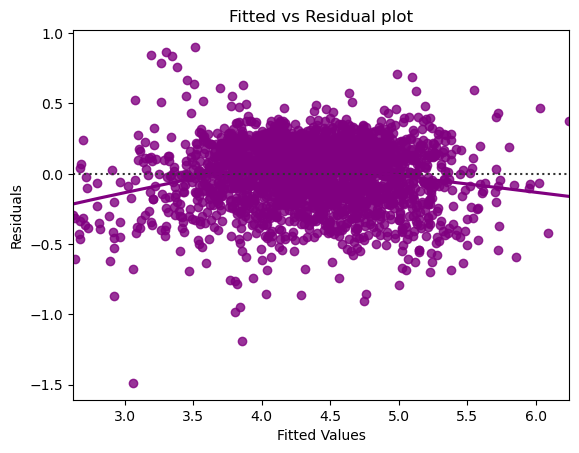

In [2699]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observation:**

- *we do not see any pattern in the plot and line is straight and linear except for tail where it's little curve. Hence, the assumptions of linearity and independence are satisfied.*

### TEST FOR NORMALITY

`Residuals(Error)` should be `normally distributed`. If they are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

We will test for normality:

-  by checking the `distribution of residuals by plotting a histplot `-(Bell shape graph for normal distribution)
-  by checking the `Q-Q plot of residuals` - (If the residuals follow a normal distribution, they will make a straight line plot, otherwise not)
-  by using the `Shapiro-Wilk test `- (If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.)
  

**Histogram plot for Actual,fiited and residual values**

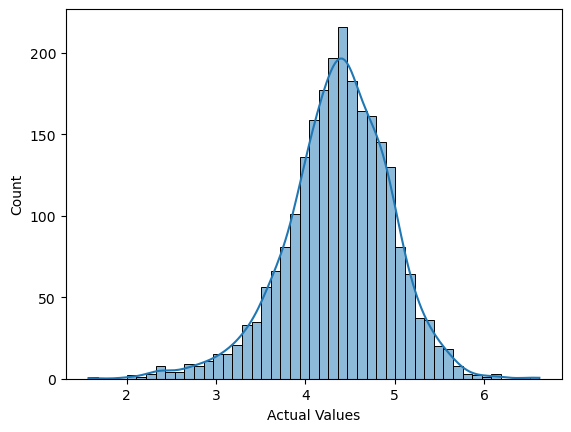

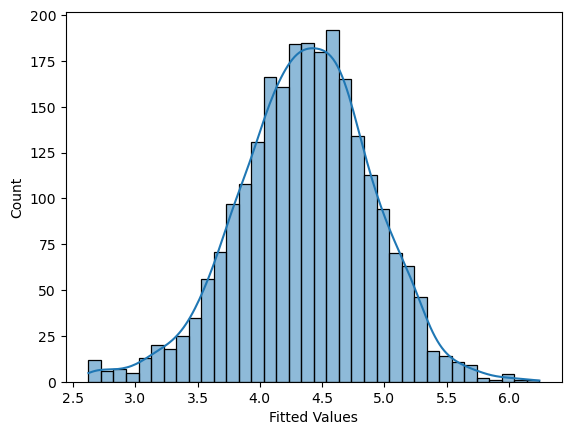

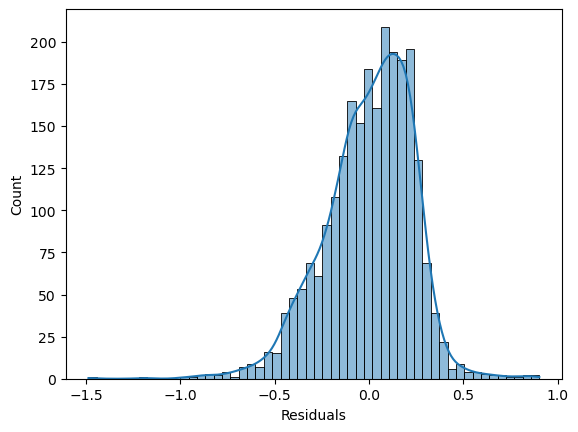

In [2704]:
#Plot the graph Histogram for actual values
sns.histplot(data=df_pred,x='Actual Values', kde=True)
plt.show()

#Plot the graph Histogram for fitted values
sns.histplot(data=df_pred,x='Fitted Values', kde=True)
plt.show()

#Plot the graph Histogram for Residuals
sns.histplot(data=df_pred,x='Residuals', kde=True)
plt.show()


**Q-Q plot**

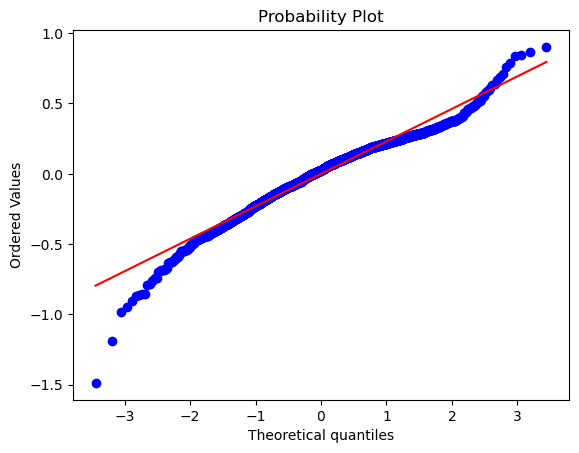

In [2706]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Shapiro-Wilk test**

In [2708]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9724019647308415, pvalue=3.462926954240665e-21)

**Observation:**

- *The `histogram plots` for `actual,fitted and residual values` are closed to `normal distributions with little skewness`*
- *For residual plot the distribution is left skewed.*
- *The `residuals` more or less follow a straight line except for the tails(`from Q-Q plot)`*.
- *Since `p-value < 0.05,` the residuals are not normal as per the `Shapiro-Wilk test`.Strictly speaking, the residuals are not normal.*
  
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

**Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

**Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

- *We will `test for homoscedasticity` by using the `goldfeldquandt test`. If we get a `p-value greater than 0.05`, we can say that the `residuals are homoscedastic.` Otherwise, they are `heteroscedastic.`*

In [2712]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test) #display F statistic and p-value

[('F statistic', 1.0554902509992026), ('p-value', 0.1752049183299785)]

**Observation**

- *Since `p-value ( 0.175)` is `greater than .05`(level of signicicance set at .05 (95% confidence interval), hence we can say `residuals are homoscedastic`.*

**So, this assumption is satisfied**

## Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [2716]:
# predictions on the test set
pred = olsmod3.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

Actual  Predicted
1995  4.566741   4.370046
2341  3.696103   3.954403
1913  3.592093   3.760742
688   4.306495   4.099280
650   4.522115   5.117977
2291  4.259294   4.392088
40    4.997685   5.404365
1884  3.875359   4.103732
2538  4.206631   4.044604
45    5.380450   5.301336

- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

**build a linear equation for the final model**

In [2719]:
# Suppress all warnings
warnings.filterwarnings("ignore")

# Let us write the equation of linear regression
Equation = "normalized used price ="
print(Equation, end=" ")
for i in range(len(x_train3.columns)):
    if i == 0:
        print(olsmod3.params[i], "+", end=" ")
    elif i != len(x_train3.columns) - 1:
        print(
            olsmod3.params[i],
            "* (",
            x_train3.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmod3.params[i], "* (", x_train3.columns[i], ")")

normalized used price = 1.2118771824465893 + 0.0432522783985076 * ( screen_size ) +  0.018872701266751498 * ( main_camera_mp ) +  0.013121453066686791 * ( selfie_camera_mp ) +  0.017211865742470397 * ( ram ) +  6.226184812228562e-05 * ( days_used ) +  0.4281848961888856 * ( normalized_new_price ) +  -0.018109095903091187 * ( years_since_release ) +  0.04889654269800814 * ( brand_name_Lenovo ) +  0.07334229761625305 * ( brand_name_Nokia ) +  0.08517107570967962 * ( brand_name_Xiaomi ) +  0.03688051823569801 * ( 4g_yes )


## Final Model

**Let's recreate the final model and print it's summary to gain insights.**

In [2722]:
#copy the train and test data 
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [2723]:
# checking model performance on train set (seen 70% data)
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1142.
Date:                   Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                           22:25:11   Log-Likelihood:                 81.071
No. Observations:                   2417   AIC:                            -138.1
Df Residuals:                       2405   BIC:                            -68.66
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [2724]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")

#check the performance on train data
olsmodel_final_train_perf = model_performance_regression(olsmodel_final,x_train_final, y_train) 
olsmodel_final_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.233989  0.183177   0.839296        0.838494  4.392265

In [2725]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test_final, y_test)
olsmodel_final_test_perf

Test Performance



RMSE    MAE  R-squared  Adj. R-squared      MAPE
0  0.238554  0.185    0.84222        0.840371  4.500963

**Observation**

- *The model is able to explain `~84% (R-Squared)` which is `high`, suggesting the model fits the data well` and is not underfitting.`*
  
- *The train and test `RMSE and MAE are low and comparable`. So, our model is `not suffering` from `overfitting`*

- *The `MAPE` on the test set suggests we can `predict within 4.5% of the normalized used price`.Lower the value better the predictions*
  
- *`MAE(Mean Absolute Error)` is `average of the absolute differences between the actual values and the predicted values`.Here the value suggests that the model `can predict normalized used price for Recell data` within a `mean error of 0.185 on the test data` and 0.183 on train data. `Smaller the MAE` better the model performance.*

Hence, we can conclude the model `olsmodel_final` is good for prediction as well as inference purposes.

## Actionable Insights and Recommendations

**Insight:**

`ReCell, a startup company` in `Refurbished and used devices` aiming to tap the potential in this market by providing cost-effective alternatives to it's consumers who are looking to save money when purchasing one. 
The dataset we have analyzed here consists of `approx 3500 used device detais`.They contains informations about screen size, brand, os ,rear and selfie camera, ram , internal memory , device age(number of days used by consumer), release year, weight, type of network support (4g or 5g) , normalized used and new price of used phones/tablets. 

The main idea here is to `analyze the data provided and build a linear regression model` to `predict the price of a used phone/tablet` and identify factors that significantly influence it.

We have perform  `data analysis`(`Exploratory Data Analysis(EDA)`), `Data Preprocessing` and build a `linear regression model` to `predict the price of a used phone/tablet` and identify the factors that significantly influence it.`

**Below are the conclusions and recommendation from our analysis**.


*From the `sample dataset of Recell`, we were able to `conclude that`,*

- *The model is able to explain `~84% of variance in the data` and within `4.5% of the normalized used price` on the `test data`, suggesting that the model is good for prediction as well as inference purposes.*

- *`normalized_new_price is strongly correlated` and by one unit, will `increase the normalized_used price` of a device `by .4282 units`, all other variable held constant.*
    
- *If the `screen size` of a used device `increase by one unit`, then the `normalized_used price `of a device `increase by .0433 units`, all `other variable held constant`.*
- *If the `ram size` of a used device increase by one unit, then the normalized_used price of a device `increase by .0172 units`, all other variable held constant.*
  
- *If the `main camera` of a used device increase by one unit, then the normalized_used price of a device `increase by .0189 units`, all other variable held constant.*

- *If the device offer `4g` then increase by one unit, will increase the normalized_used price of a device `increase by .014 units`, all other variable held constant.*
- *year since released date is `negatively correlated `to used price. one unit `increase in years_since_release` will `decrease` the device price by `-0.0181  units.`*
- *In general `normalized_new price ,screen_size, rear and front camera, 4g, ram, days_used`  are linearly `positively correlated` with `normalized used price` and are significant in predicting price of used device.*
  
- *We also noticed `brand and os ` did not have significant affect on predicting the price. The model predicted the similar price with and without this informations.*
  
- *As noticed earlier that `dropping high p-value variables` did not affect the model much as the adjusted R-Squared is nearly the same.*

**Recommendations**

**Below are the recommendation to the business :**

- *We observed from our analysis that `normalized_new price` of a device with same model make have `strong effect on predicting the used price of device`. Which is as expected, Recell should consider it as a important factor while baseline the price for used devices.*
  
- *Device with `larger the screen size(larger phone/tablets)` often demands higher price and used price should be considered high.*
  
- *`Camera specification is again an important factor `while setting the price. devices with better camera, higher resoultion and zooming features tends to get expensive. Due to popularity on social media(facebook, Insta etc) posting and making reels are very common these days and people always pay more for devices with good rear and back camera.*
  
- *`Proccessing the is also an important points` to be considered, in this digital world getting millions of data in a fraction of secs is very common.with so much data to proccess quickly on a single device(photos,docs,app, emails etc) , a device with large ram becomes essentials. Thus the pricing for devices with large ram should be high.*
  
- *`Resale value of 5g devices is high` but it was `not used in predicting price` of used devices. Which could be because 5g network are not established or easily available in  everywhere.A geographical data is need for further analysis.  We also saw `4g network is more important` in determining the used price as compared to 5g.*
- *Year since released date is also an important factor to considered during pricing the device.older the device low will be the resale value.Keeping latest model phone with high price will generate more revenue and good for business*
  
- *In `short recell` should consider `normalized_new price ,screen_size, rear and front camera, 4g, ram, year released` for predicting the price of used devices. and offered consumers the devices with latest model,large ram, high camera resoultions for generating more revenues*